In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Nellore']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
2121,2124,14.53,80.16,Nellore,Indukurpeta,Gangapatnam,Black,7.75,0.65,1.04,...,1.92,24.80,1.64,1.60,0.310369,0.203352,0.392466,0.858769,-0.300398,Paddy
2122,2125,14.53,80.15,Nellore,Indukurpeta,Gangapatnam,Black,7.02,0.56,0.81,...,1.54,21.10,0.98,0.24,0.104885,0.140139,0.117925,0.051984,-0.025333,Paddy
2123,2126,14.53,80.16,Nellore,Indukurpeta,Gangapatnam,Black,7.50,0.31,0.46,...,1.84,17.96,0.70,0.38,0.310369,0.203352,0.392466,0.858769,-0.300398,Paddy
2124,2127,14.54,80.16,Nellore,Indukurpeta,Gangapatnam,Black,8.28,0.90,0.65,...,1.08,70.68,2.26,5.60,0.025054,0.051326,0.025645,0.003152,-0.001574,Paddy
2125,2128,14.54,80.16,Nellore,Indukurpeta,Gangapatnam,Black,8.11,0.96,0.50,...,1.25,31.18,1.46,2.78,0.025054,0.051326,0.025645,0.003152,-0.001574,Paddy


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'NDVI', 'EVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,ARVI
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,7.937333,0.617448,0.598897,12.970276,189.786207,3501.717241,770.052874,93.140805,1.936368,1.536966,39.908828,3.049977,11.783747,0.100571
std,0.680049,0.648608,0.242528,15.480318,139.508957,1677.652106,413.569089,151.978416,2.283530,0.831028,39.992340,2.119376,9.013484,0.112880
min,5.250000,0.060000,0.120000,0.660000,33.000000,237.000000,48.000000,1.880000,0.100000,0.160000,1.040000,0.180000,0.090000,0.003807
25%,7.780000,0.180000,0.400000,4.845000,112.500000,2339.000000,454.500000,7.520000,0.550000,0.900000,4.485000,1.175000,6.265000,0.040338
50%,8.120000,0.490000,0.570000,8.380000,164.000000,3205.000000,686.000000,55.550000,1.200000,1.390000,29.700000,2.360000,9.130000,0.054356
75%,8.340000,0.815000,0.790000,14.490000,232.500000,4595.000000,1014.000000,121.180000,2.325000,2.035000,65.100000,4.605000,14.690000,0.120560
max,9.330000,7.850000,1.330000,144.750000,2069.000000,9763.000000,1989.000000,2210.320000,23.920000,8.270000,210.830000,9.730000,60.260000,0.498534


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black', 'Redsoil', ' Black'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace([' Black', 'Black'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace('Redsoil', 'Red Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Soil': 326, 'Red Soil': 109}

<BarContainer object of 2 artists>

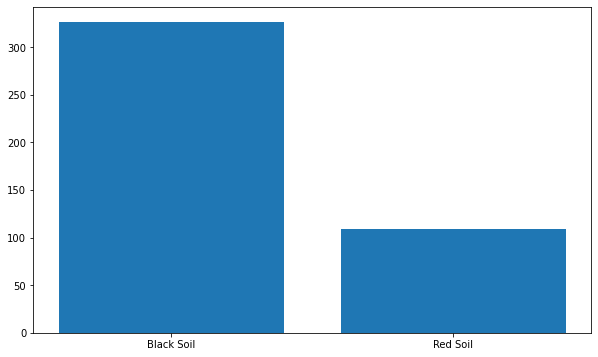

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Paddy', 'Citrus', 'Black gram', 'Green Gram', 'Banana'],
      dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy         267
Citrus        105
Black gram     58
Green Gram      3
Banana          2
Name: Crop, dtype: int64

Paddy         267
Citrus        105
Black gram     58
Name: Crop, dtype: int64


<BarContainer object of 3 artists>

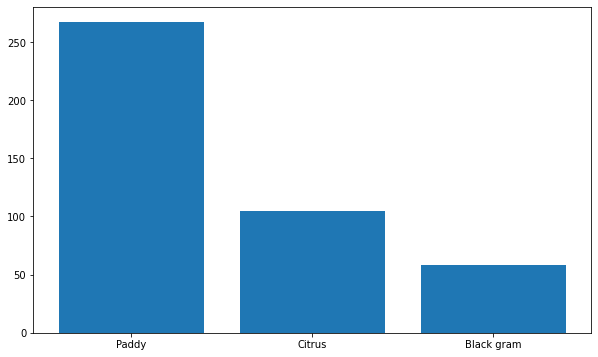

In [15]:
df = df[(df['Crop'] != 'Green Gram') & (df['Crop'] != 'Banana')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,ARVI
pH,1.000000,-0.108915,-0.399399,-0.099154,0.097205,0.450152,0.122614,-0.138248,-0.318327,-0.213884,-0.667716,-0.310622,-0.358780,-0.186538
EC,-0.108915,1.000000,0.331162,0.141713,0.093619,-0.101416,0.231990,0.902309,0.222913,0.649595,0.351346,0.388928,0.225186,0.188802
OC,-0.399399,0.331162,1.000000,0.290462,0.234016,-0.167425,0.375132,0.275485,0.404378,0.591678,0.577696,0.632627,0.446818,0.035286
P,-0.099154,0.141713,0.290462,1.000000,0.356177,-0.141434,0.090374,0.056146,0.317506,0.232979,0.111724,0.052044,0.028789,0.164358
K,0.097205,0.093619,0.234016,0.356177,1.000000,0.140109,0.414285,0.028019,0.053325,0.269589,-0.001686,0.251244,0.210238,-0.078961
Ca,0.450152,-0.101416,-0.167425,-0.141434,0.140109,1.000000,0.451852,-0.034903,-0.279925,-0.038406,-0.395262,-0.094940,-0.029566,-0.265318
Mg,0.122614,0.231990,0.375132,0.090374,0.414285,0.451852,1.000000,0.172174,0.005222,0.524759,0.173382,0.595319,0.453250,-0.041366
S,-0.138248,0.902309,0.275485,0.056146,0.028019,-0.034903,0.172174,1.000000,0.179381,0.615608,0.297580,0.320158,0.182469,0.093521
Zn,-0.318327,0.222913,0.404378,0.317506,0.053325,-0.279925,0.005222,0.179381,1.000000,0.252096,0.355795,0.277374,0.092095,0.137633
B,-0.213884,0.649595,0.591678,0.232979,0.269589,-0.038406,0.524759,0.615608,0.252096,1.000000,0.530394,0.633859,0.507055,0.110370


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['S', 'B', 'Fe', 'Cu', 'Mn']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'K', 'Ca', 'Mg', 'Zn', 'ARVI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P      K      Ca     Mg    Zn      ARVI  \
2121  7.75  0.65  1.04  3.18  126.0  1212.0  389.0  5.02  0.203352   

      Black Soil  Red Soil  
2121           1         0  
2121    Paddy
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:9] = sc1.fit_transform(X[:, 0:9])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8703703703703703


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.80 %
Standard Deviation: 6.70 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8518518518518519


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 79.83 %
Standard Deviation: 4.15 %


# Random Forest Classifier

In [47]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [48]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [49]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8796296296296297


In [50]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 88.19 %
Standard Deviation: 5.18 %


In [51]:
# pickle.dump(clf3, open('Nellore_model.pkl', 'wb'))
# pickle.dump(sc1, open('Nellore_scaler.pkl', 'wb'))

# XGBoost

In [52]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [53]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [54]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8888888888888888


In [55]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [56]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 86.96 %
Standard Deviation: 5.34 %


# Multi-layer Perceptron Classifier

In [57]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [58]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [59]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.922360248447205
Testing Accuracy:  0.8703703703703703


In [60]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 86.02 %
Standard Deviation: 5.09 %


# Catboost

In [46]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.5806178	total: 140ms	remaining: 13.9s
1:	learn: 0.4134885	total: 141ms	remaining: 6.9s
2:	learn: 0.3646275	total: 141ms	remaining: 4.57s
3:	learn: 0.3343098	total: 142ms	remaining: 3.41s
4:	learn: 0.3308014	total: 143ms	remaining: 2.71s
5:	learn: 0.3179621	total: 143ms	remaining: 2.24s
6:	learn: 0.3121266	total: 144ms	remaining: 1.91s
7:	learn: 0.3037024	total: 144ms	remaining: 1.66s
8:	learn: 0.2943324	total: 145ms	remaining: 1.46s
9:	learn: 0.2898400	total: 145ms	remaining: 1.31s
10:	learn: 0.2736762	total: 146ms	remaining: 1.18s
11:	learn: 0.2596743	total: 146ms	remaining: 1.07s
12:	learn: 0.2551309	total: 147ms	remaining: 983ms
13:	learn: 0.2512697	total: 147ms	remaining: 906ms
14:	learn: 0.2483619	total: 148ms	remaining: 839ms
15:	learn: 0.2448764	total: 149ms	remaining: 780ms
16:	learn: 0.2409346	total: 149ms	remaining: 728ms
17:	learn: 0.2387938	total: 150ms	remaining: 682ms
18:	learn: 0.2363204	total: 150ms	remaining: 640ms
19:	learn: 0.2303433	total: 151ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.3982178489
bestIteration = 99

Training on fold [1/5]

bestTest = 0.5038549739
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3914137098
bestIteration = 99

Training on fold [3/5]

bestTest = 0.4352813558
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3621191243
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0664930	test: 1.0662603	best: 1.0662603 (0)	total: 1.35ms	remaining: 1.35s
1:	learn: 1.0365697	test: 1.0356477	best: 1.0356477 (1)	total: 2.54ms	remaining: 1.27s
2:	learn: 1.0135038	test: 1.0143294	best: 1.0143294 (2)	total: 3.6ms	remaining: 1.2s
3:	learn: 0.9866472	test: 0.9877347	best: 0.9877347 (3)	total: 4.68ms	remaining: 1.17s
4:	learn: 0.9591504	test: 0.9599479	best: 0.9599479 (4)	total: 5.76ms	remaining: 1.15s
5:	learn: 0.9369801	test: 0.9363785	best: 0.9363785 (5)	total: 6.77ms	remaining: 1.12s
6:	learn: 0.9129773	test: 0.9123850	best: 0.9123850 (6)	total: 7.84ms	remaining: 1.11s
7:	learn: 0.8916709	test: 0.8924144	best: 0.8924144 (7)	total: 8.92ms	remaining: 1.11s
8:	learn: 0.8706817	test: 0.8724985	best: 0.8724985 (8)	total: 10.1ms	remaining: 1.11s
9:	learn: 0.8523947	test: 0.8513368	best: 0.8513368 (9)	total: 11.2ms	remaining: 1.11s
10:	learn: 0.8333716	test: 0.8294750	best: 0.8294750 (10)	total: 12.3ms	remaining: 1.11s
11:	learn: 0.8129225	test: 0.8101139	best: 

159:	learn: 0.2659780	test: 0.2857595	best: 0.2857595 (159)	total: 174ms	remaining: 914ms
160:	learn: 0.2649306	test: 0.2852942	best: 0.2852942 (160)	total: 175ms	remaining: 913ms
161:	learn: 0.2642710	test: 0.2850864	best: 0.2850864 (161)	total: 176ms	remaining: 913ms
162:	learn: 0.2638054	test: 0.2852330	best: 0.2850864 (161)	total: 178ms	remaining: 912ms
163:	learn: 0.2626341	test: 0.2844698	best: 0.2844698 (163)	total: 179ms	remaining: 910ms
164:	learn: 0.2620389	test: 0.2837134	best: 0.2837134 (164)	total: 180ms	remaining: 909ms
165:	learn: 0.2616130	test: 0.2832996	best: 0.2832996 (165)	total: 181ms	remaining: 908ms
166:	learn: 0.2609116	test: 0.2826428	best: 0.2826428 (166)	total: 182ms	remaining: 906ms
167:	learn: 0.2603483	test: 0.2822481	best: 0.2822481 (167)	total: 183ms	remaining: 905ms
168:	learn: 0.2596461	test: 0.2815591	best: 0.2815591 (168)	total: 184ms	remaining: 903ms
169:	learn: 0.2588174	test: 0.2817703	best: 0.2815591 (168)	total: 185ms	remaining: 902ms
170:	learn

325:	learn: 0.1842614	test: 0.2529826	best: 0.2529826 (325)	total: 347ms	remaining: 718ms
326:	learn: 0.1839079	test: 0.2531575	best: 0.2529826 (325)	total: 348ms	remaining: 717ms
327:	learn: 0.1834657	test: 0.2531277	best: 0.2529826 (325)	total: 350ms	remaining: 717ms
328:	learn: 0.1832970	test: 0.2529484	best: 0.2529484 (328)	total: 351ms	remaining: 716ms
329:	learn: 0.1827423	test: 0.2532165	best: 0.2529484 (328)	total: 352ms	remaining: 714ms
330:	learn: 0.1826115	test: 0.2530127	best: 0.2529484 (328)	total: 353ms	remaining: 713ms
331:	learn: 0.1820073	test: 0.2530014	best: 0.2529484 (328)	total: 354ms	remaining: 712ms
332:	learn: 0.1815597	test: 0.2525147	best: 0.2525147 (332)	total: 355ms	remaining: 711ms
333:	learn: 0.1812115	test: 0.2524295	best: 0.2524295 (333)	total: 356ms	remaining: 710ms
334:	learn: 0.1808155	test: 0.2521408	best: 0.2521408 (334)	total: 357ms	remaining: 708ms
335:	learn: 0.1803673	test: 0.2518315	best: 0.2518315 (335)	total: 358ms	remaining: 707ms
336:	learn

471:	learn: 0.1443356	test: 0.2499141	best: 0.2492572 (384)	total: 520ms	remaining: 581ms
472:	learn: 0.1441832	test: 0.2500472	best: 0.2492572 (384)	total: 521ms	remaining: 581ms
473:	learn: 0.1436009	test: 0.2505313	best: 0.2492572 (384)	total: 523ms	remaining: 580ms
474:	learn: 0.1431004	test: 0.2502364	best: 0.2492572 (384)	total: 524ms	remaining: 579ms
475:	learn: 0.1428990	test: 0.2503376	best: 0.2492572 (384)	total: 525ms	remaining: 578ms
476:	learn: 0.1427277	test: 0.2501109	best: 0.2492572 (384)	total: 526ms	remaining: 576ms
477:	learn: 0.1426260	test: 0.2499842	best: 0.2492572 (384)	total: 527ms	remaining: 575ms
478:	learn: 0.1421240	test: 0.2495951	best: 0.2492572 (384)	total: 528ms	remaining: 574ms
479:	learn: 0.1417962	test: 0.2495641	best: 0.2492572 (384)	total: 529ms	remaining: 573ms
480:	learn: 0.1416590	test: 0.2496109	best: 0.2492572 (384)	total: 530ms	remaining: 572ms
481:	learn: 0.1414143	test: 0.2494777	best: 0.2492572 (384)	total: 531ms	remaining: 571ms
482:	learn

624:	learn: 0.1135778	test: 0.2485354	best: 0.2472838 (588)	total: 693ms	remaining: 416ms
625:	learn: 0.1134700	test: 0.2484714	best: 0.2472838 (588)	total: 694ms	remaining: 415ms
626:	learn: 0.1134165	test: 0.2485229	best: 0.2472838 (588)	total: 695ms	remaining: 414ms
627:	learn: 0.1132467	test: 0.2483838	best: 0.2472838 (588)	total: 696ms	remaining: 412ms
628:	learn: 0.1130996	test: 0.2484383	best: 0.2472838 (588)	total: 697ms	remaining: 411ms
629:	learn: 0.1129315	test: 0.2486052	best: 0.2472838 (588)	total: 698ms	remaining: 410ms
630:	learn: 0.1127980	test: 0.2486604	best: 0.2472838 (588)	total: 700ms	remaining: 409ms
631:	learn: 0.1127197	test: 0.2487226	best: 0.2472838 (588)	total: 701ms	remaining: 408ms
632:	learn: 0.1126065	test: 0.2485420	best: 0.2472838 (588)	total: 702ms	remaining: 407ms
633:	learn: 0.1125445	test: 0.2485846	best: 0.2472838 (588)	total: 703ms	remaining: 406ms
634:	learn: 0.1123049	test: 0.2487326	best: 0.2472838 (588)	total: 704ms	remaining: 405ms
635:	learn

780:	learn: 0.0906340	test: 0.2506035	best: 0.2472838 (588)	total: 865ms	remaining: 243ms
781:	learn: 0.0905794	test: 0.2506183	best: 0.2472838 (588)	total: 867ms	remaining: 242ms
782:	learn: 0.0904674	test: 0.2507497	best: 0.2472838 (588)	total: 868ms	remaining: 241ms
783:	learn: 0.0903737	test: 0.2508793	best: 0.2472838 (588)	total: 869ms	remaining: 239ms
784:	learn: 0.0901864	test: 0.2510202	best: 0.2472838 (588)	total: 870ms	remaining: 238ms
785:	learn: 0.0901363	test: 0.2509550	best: 0.2472838 (588)	total: 872ms	remaining: 237ms
786:	learn: 0.0900041	test: 0.2510659	best: 0.2472838 (588)	total: 873ms	remaining: 236ms
787:	learn: 0.0898540	test: 0.2510077	best: 0.2472838 (588)	total: 874ms	remaining: 235ms
788:	learn: 0.0897533	test: 0.2510212	best: 0.2472838 (588)	total: 875ms	remaining: 234ms
789:	learn: 0.0895992	test: 0.2511293	best: 0.2472838 (588)	total: 876ms	remaining: 233ms
790:	learn: 0.0895124	test: 0.2511266	best: 0.2472838 (588)	total: 877ms	remaining: 232ms
791:	learn

931:	learn: 0.0753962	test: 0.2539919	best: 0.2472838 (588)	total: 1.04s	remaining: 75.8ms
932:	learn: 0.0753078	test: 0.2540022	best: 0.2472838 (588)	total: 1.04s	remaining: 74.7ms
933:	learn: 0.0752442	test: 0.2538393	best: 0.2472838 (588)	total: 1.04s	remaining: 73.6ms
934:	learn: 0.0751161	test: 0.2538419	best: 0.2472838 (588)	total: 1.04s	remaining: 72.5ms
935:	learn: 0.0750924	test: 0.2538079	best: 0.2472838 (588)	total: 1.04s	remaining: 71.4ms
936:	learn: 0.0750034	test: 0.2538896	best: 0.2472838 (588)	total: 1.04s	remaining: 70.3ms
937:	learn: 0.0749237	test: 0.2540243	best: 0.2472838 (588)	total: 1.05s	remaining: 69.2ms
938:	learn: 0.0748869	test: 0.2540169	best: 0.2472838 (588)	total: 1.05s	remaining: 68.1ms
939:	learn: 0.0747957	test: 0.2540006	best: 0.2472838 (588)	total: 1.05s	remaining: 67ms
940:	learn: 0.0747516	test: 0.2540081	best: 0.2472838 (588)	total: 1.05s	remaining: 65.9ms
941:	learn: 0.0746386	test: 0.2536169	best: 0.2472838 (588)	total: 1.05s	remaining: 64.8ms
9

52:	learn: 0.2550143	test: 0.2789489	best: 0.2789489 (52)	total: 71.4ms	remaining: 1.27s
53:	learn: 0.2533325	test: 0.2770820	best: 0.2770820 (53)	total: 73.2ms	remaining: 1.28s
54:	learn: 0.2507005	test: 0.2771655	best: 0.2770820 (53)	total: 74.6ms	remaining: 1.28s
55:	learn: 0.2482804	test: 0.2751632	best: 0.2751632 (55)	total: 75.8ms	remaining: 1.28s
56:	learn: 0.2455545	test: 0.2714475	best: 0.2714475 (56)	total: 77.1ms	remaining: 1.27s
57:	learn: 0.2428698	test: 0.2712244	best: 0.2712244 (57)	total: 78.3ms	remaining: 1.27s
58:	learn: 0.2419146	test: 0.2688991	best: 0.2688991 (58)	total: 79.5ms	remaining: 1.27s
59:	learn: 0.2400437	test: 0.2667132	best: 0.2667132 (59)	total: 80.8ms	remaining: 1.27s
60:	learn: 0.2391637	test: 0.2660521	best: 0.2660521 (60)	total: 82.1ms	remaining: 1.26s
61:	learn: 0.2359735	test: 0.2683204	best: 0.2660521 (60)	total: 83.4ms	remaining: 1.26s
62:	learn: 0.2339582	test: 0.2688012	best: 0.2660521 (60)	total: 84.8ms	remaining: 1.26s
63:	learn: 0.2320973	

193:	learn: 0.1101103	test: 0.2377797	best: 0.2364142 (191)	total: 243ms	remaining: 1.01s
194:	learn: 0.1098097	test: 0.2377119	best: 0.2364142 (191)	total: 244ms	remaining: 1.01s
195:	learn: 0.1094963	test: 0.2375200	best: 0.2364142 (191)	total: 245ms	remaining: 1.01s
196:	learn: 0.1089927	test: 0.2378518	best: 0.2364142 (191)	total: 247ms	remaining: 1s
197:	learn: 0.1081483	test: 0.2377512	best: 0.2364142 (191)	total: 248ms	remaining: 1s
198:	learn: 0.1078990	test: 0.2374827	best: 0.2364142 (191)	total: 249ms	remaining: 1s
199:	learn: 0.1073126	test: 0.2376023	best: 0.2364142 (191)	total: 250ms	remaining: 999ms
200:	learn: 0.1065871	test: 0.2374648	best: 0.2364142 (191)	total: 251ms	remaining: 998ms
201:	learn: 0.1061410	test: 0.2378298	best: 0.2364142 (191)	total: 252ms	remaining: 997ms
202:	learn: 0.1055551	test: 0.2363004	best: 0.2363004 (202)	total: 253ms	remaining: 995ms
203:	learn: 0.1053704	test: 0.2360203	best: 0.2360203 (203)	total: 255ms	remaining: 993ms
204:	learn: 0.10523

340:	learn: 0.0589011	test: 0.2457755	best: 0.2358611 (236)	total: 414ms	remaining: 799ms
341:	learn: 0.0586753	test: 0.2457615	best: 0.2358611 (236)	total: 415ms	remaining: 799ms
342:	learn: 0.0584588	test: 0.2459520	best: 0.2358611 (236)	total: 416ms	remaining: 798ms
343:	learn: 0.0580761	test: 0.2451202	best: 0.2358611 (236)	total: 418ms	remaining: 796ms
344:	learn: 0.0577829	test: 0.2458323	best: 0.2358611 (236)	total: 419ms	remaining: 795ms
345:	learn: 0.0576978	test: 0.2457198	best: 0.2358611 (236)	total: 420ms	remaining: 794ms
346:	learn: 0.0575762	test: 0.2457540	best: 0.2358611 (236)	total: 421ms	remaining: 792ms
347:	learn: 0.0572367	test: 0.2454855	best: 0.2358611 (236)	total: 422ms	remaining: 791ms
348:	learn: 0.0571716	test: 0.2455319	best: 0.2358611 (236)	total: 423ms	remaining: 789ms
349:	learn: 0.0568839	test: 0.2457563	best: 0.2358611 (236)	total: 425ms	remaining: 788ms
350:	learn: 0.0564330	test: 0.2454691	best: 0.2358611 (236)	total: 427ms	remaining: 789ms
351:	learn

492:	learn: 0.0362806	test: 0.2493384	best: 0.2358611 (236)	total: 585ms	remaining: 602ms
493:	learn: 0.0362014	test: 0.2499112	best: 0.2358611 (236)	total: 586ms	remaining: 600ms
494:	learn: 0.0361035	test: 0.2504488	best: 0.2358611 (236)	total: 587ms	remaining: 599ms
495:	learn: 0.0360534	test: 0.2508551	best: 0.2358611 (236)	total: 588ms	remaining: 598ms
496:	learn: 0.0359310	test: 0.2508712	best: 0.2358611 (236)	total: 590ms	remaining: 597ms
497:	learn: 0.0358458	test: 0.2509721	best: 0.2358611 (236)	total: 591ms	remaining: 595ms
498:	learn: 0.0357887	test: 0.2509201	best: 0.2358611 (236)	total: 592ms	remaining: 594ms
499:	learn: 0.0357542	test: 0.2508338	best: 0.2358611 (236)	total: 593ms	remaining: 593ms
500:	learn: 0.0356643	test: 0.2512184	best: 0.2358611 (236)	total: 594ms	remaining: 592ms
501:	learn: 0.0355271	test: 0.2508790	best: 0.2358611 (236)	total: 595ms	remaining: 590ms
502:	learn: 0.0354537	test: 0.2510311	best: 0.2358611 (236)	total: 596ms	remaining: 589ms
503:	learn

627:	learn: 0.0269200	test: 0.2529094	best: 0.2358611 (236)	total: 758ms	remaining: 449ms
628:	learn: 0.0268953	test: 0.2530956	best: 0.2358611 (236)	total: 759ms	remaining: 448ms
629:	learn: 0.0268376	test: 0.2536166	best: 0.2358611 (236)	total: 760ms	remaining: 447ms
630:	learn: 0.0267721	test: 0.2538758	best: 0.2358611 (236)	total: 761ms	remaining: 445ms
631:	learn: 0.0267546	test: 0.2537885	best: 0.2358611 (236)	total: 763ms	remaining: 444ms
632:	learn: 0.0266606	test: 0.2539451	best: 0.2358611 (236)	total: 764ms	remaining: 443ms
633:	learn: 0.0266480	test: 0.2540320	best: 0.2358611 (236)	total: 765ms	remaining: 441ms
634:	learn: 0.0265782	test: 0.2544290	best: 0.2358611 (236)	total: 766ms	remaining: 440ms
635:	learn: 0.0265582	test: 0.2544228	best: 0.2358611 (236)	total: 767ms	remaining: 439ms
636:	learn: 0.0265383	test: 0.2544007	best: 0.2358611 (236)	total: 768ms	remaining: 438ms
637:	learn: 0.0264881	test: 0.2543177	best: 0.2358611 (236)	total: 769ms	remaining: 436ms
638:	learn

779:	learn: 0.0205448	test: 0.2634067	best: 0.2358611 (236)	total: 930ms	remaining: 262ms
780:	learn: 0.0205093	test: 0.2636947	best: 0.2358611 (236)	total: 932ms	remaining: 261ms
781:	learn: 0.0204964	test: 0.2637789	best: 0.2358611 (236)	total: 933ms	remaining: 260ms
782:	learn: 0.0204605	test: 0.2640424	best: 0.2358611 (236)	total: 934ms	remaining: 259ms
783:	learn: 0.0204498	test: 0.2639714	best: 0.2358611 (236)	total: 935ms	remaining: 258ms
784:	learn: 0.0203949	test: 0.2642736	best: 0.2358611 (236)	total: 936ms	remaining: 256ms
785:	learn: 0.0203731	test: 0.2644984	best: 0.2358611 (236)	total: 938ms	remaining: 255ms
786:	learn: 0.0203574	test: 0.2645370	best: 0.2358611 (236)	total: 939ms	remaining: 254ms
787:	learn: 0.0203188	test: 0.2644768	best: 0.2358611 (236)	total: 940ms	remaining: 253ms
788:	learn: 0.0202978	test: 0.2645348	best: 0.2358611 (236)	total: 941ms	remaining: 252ms
789:	learn: 0.0202912	test: 0.2645913	best: 0.2358611 (236)	total: 942ms	remaining: 250ms
790:	learn

934:	learn: 0.0165748	test: 0.2724284	best: 0.2358611 (236)	total: 1.1s	remaining: 76.6ms
935:	learn: 0.0165570	test: 0.2723574	best: 0.2358611 (236)	total: 1.1s	remaining: 75.5ms
936:	learn: 0.0165352	test: 0.2723179	best: 0.2358611 (236)	total: 1.1s	remaining: 74.3ms
937:	learn: 0.0165248	test: 0.2723282	best: 0.2358611 (236)	total: 1.11s	remaining: 73.1ms
938:	learn: 0.0164901	test: 0.2722852	best: 0.2358611 (236)	total: 1.11s	remaining: 71.9ms
939:	learn: 0.0164787	test: 0.2724322	best: 0.2358611 (236)	total: 1.11s	remaining: 70.8ms
940:	learn: 0.0164720	test: 0.2724072	best: 0.2358611 (236)	total: 1.11s	remaining: 69.6ms
941:	learn: 0.0164357	test: 0.2718955	best: 0.2358611 (236)	total: 1.11s	remaining: 68.4ms
942:	learn: 0.0164201	test: 0.2718349	best: 0.2358611 (236)	total: 1.11s	remaining: 67.2ms
943:	learn: 0.0164047	test: 0.2718023	best: 0.2358611 (236)	total: 1.11s	remaining: 66ms
944:	learn: 0.0163929	test: 0.2720444	best: 0.2358611 (236)	total: 1.11s	remaining: 64.8ms
945:

32:	learn: 0.5961442	test: 0.6155066	best: 0.6155066 (32)	total: 102ms	remaining: 2.99s
33:	learn: 0.5879343	test: 0.6064851	best: 0.6064851 (33)	total: 105ms	remaining: 2.98s
34:	learn: 0.5802917	test: 0.5993755	best: 0.5993755 (34)	total: 108ms	remaining: 2.98s
35:	learn: 0.5730104	test: 0.5929510	best: 0.5929510 (35)	total: 111ms	remaining: 2.98s
36:	learn: 0.5659027	test: 0.5849021	best: 0.5849021 (36)	total: 115ms	remaining: 2.99s
37:	learn: 0.5585901	test: 0.5774973	best: 0.5774973 (37)	total: 118ms	remaining: 2.99s
38:	learn: 0.5505906	test: 0.5691327	best: 0.5691327 (38)	total: 119ms	remaining: 2.93s
39:	learn: 0.5429835	test: 0.5626115	best: 0.5626115 (39)	total: 122ms	remaining: 2.93s
40:	learn: 0.5362131	test: 0.5562143	best: 0.5562143 (40)	total: 125ms	remaining: 2.92s
41:	learn: 0.5297507	test: 0.5494086	best: 0.5494086 (41)	total: 128ms	remaining: 2.92s
42:	learn: 0.5226527	test: 0.5439214	best: 0.5439214 (42)	total: 131ms	remaining: 2.92s
43:	learn: 0.5153380	test: 0.536

155:	learn: 0.2379534	test: 0.3094592	best: 0.3094592 (155)	total: 457ms	remaining: 2.47s
156:	learn: 0.2371599	test: 0.3087038	best: 0.3087038 (156)	total: 461ms	remaining: 2.48s
157:	learn: 0.2362876	test: 0.3088588	best: 0.3087038 (156)	total: 464ms	remaining: 2.47s
158:	learn: 0.2353577	test: 0.3080348	best: 0.3080348 (158)	total: 467ms	remaining: 2.47s
159:	learn: 0.2345976	test: 0.3076931	best: 0.3076931 (159)	total: 470ms	remaining: 2.47s
160:	learn: 0.2337242	test: 0.3067788	best: 0.3067788 (160)	total: 473ms	remaining: 2.46s
161:	learn: 0.2324796	test: 0.3062335	best: 0.3062335 (161)	total: 476ms	remaining: 2.46s
162:	learn: 0.2314525	test: 0.3056861	best: 0.3056861 (162)	total: 480ms	remaining: 2.46s
163:	learn: 0.2303787	test: 0.3052974	best: 0.3052974 (163)	total: 483ms	remaining: 2.46s
164:	learn: 0.2292892	test: 0.3050683	best: 0.3050683 (164)	total: 485ms	remaining: 2.46s
165:	learn: 0.2284856	test: 0.3051509	best: 0.3050683 (164)	total: 488ms	remaining: 2.45s
166:	learn

290:	learn: 0.1506954	test: 0.2684004	best: 0.2683799 (288)	total: 826ms	remaining: 2.01s
291:	learn: 0.1504376	test: 0.2680423	best: 0.2680423 (291)	total: 829ms	remaining: 2.01s
292:	learn: 0.1500225	test: 0.2683233	best: 0.2680423 (291)	total: 831ms	remaining: 2.01s
293:	learn: 0.1498774	test: 0.2681279	best: 0.2680423 (291)	total: 834ms	remaining: 2s
294:	learn: 0.1494259	test: 0.2681565	best: 0.2680423 (291)	total: 838ms	remaining: 2s
295:	learn: 0.1487268	test: 0.2680174	best: 0.2680174 (295)	total: 841ms	remaining: 2s
296:	learn: 0.1480432	test: 0.2678969	best: 0.2678969 (296)	total: 845ms	remaining: 2s
297:	learn: 0.1477379	test: 0.2677730	best: 0.2677730 (297)	total: 848ms	remaining: 2s
298:	learn: 0.1473737	test: 0.2678988	best: 0.2677730 (297)	total: 850ms	remaining: 1.99s
299:	learn: 0.1468599	test: 0.2680623	best: 0.2677730 (297)	total: 853ms	remaining: 1.99s
300:	learn: 0.1467517	test: 0.2680791	best: 0.2677730 (297)	total: 855ms	remaining: 1.99s
301:	learn: 0.1461712	tes

424:	learn: 0.1050397	test: 0.2628561	best: 0.2619992 (408)	total: 1.19s	remaining: 1.61s
425:	learn: 0.1048332	test: 0.2629598	best: 0.2619992 (408)	total: 1.19s	remaining: 1.6s
426:	learn: 0.1044736	test: 0.2628684	best: 0.2619992 (408)	total: 1.19s	remaining: 1.6s
427:	learn: 0.1042396	test: 0.2629967	best: 0.2619992 (408)	total: 1.2s	remaining: 1.6s
428:	learn: 0.1039455	test: 0.2626020	best: 0.2619992 (408)	total: 1.2s	remaining: 1.6s
429:	learn: 0.1036926	test: 0.2622277	best: 0.2619992 (408)	total: 1.2s	remaining: 1.59s
430:	learn: 0.1034412	test: 0.2623124	best: 0.2619992 (408)	total: 1.21s	remaining: 1.59s
431:	learn: 0.1033428	test: 0.2623042	best: 0.2619992 (408)	total: 1.21s	remaining: 1.59s
432:	learn: 0.1032286	test: 0.2621940	best: 0.2619992 (408)	total: 1.21s	remaining: 1.59s
433:	learn: 0.1028596	test: 0.2622402	best: 0.2619992 (408)	total: 1.22s	remaining: 1.59s
434:	learn: 0.1025623	test: 0.2625726	best: 0.2619992 (408)	total: 1.22s	remaining: 1.58s
435:	learn: 0.102

554:	learn: 0.0786404	test: 0.2606943	best: 0.2604241 (542)	total: 1.55s	remaining: 1.24s
555:	learn: 0.0784368	test: 0.2607705	best: 0.2604241 (542)	total: 1.55s	remaining: 1.24s
556:	learn: 0.0782724	test: 0.2604664	best: 0.2604241 (542)	total: 1.56s	remaining: 1.24s
557:	learn: 0.0781401	test: 0.2604082	best: 0.2604082 (557)	total: 1.56s	remaining: 1.24s
558:	learn: 0.0778932	test: 0.2602983	best: 0.2602983 (558)	total: 1.56s	remaining: 1.23s
559:	learn: 0.0777501	test: 0.2602666	best: 0.2602666 (559)	total: 1.56s	remaining: 1.23s
560:	learn: 0.0775852	test: 0.2600766	best: 0.2600766 (560)	total: 1.57s	remaining: 1.23s
561:	learn: 0.0774779	test: 0.2600890	best: 0.2600766 (560)	total: 1.57s	remaining: 1.23s
562:	learn: 0.0773518	test: 0.2601060	best: 0.2600766 (560)	total: 1.57s	remaining: 1.22s
563:	learn: 0.0772748	test: 0.2599998	best: 0.2599998 (563)	total: 1.58s	remaining: 1.22s
564:	learn: 0.0772077	test: 0.2599321	best: 0.2599321 (564)	total: 1.58s	remaining: 1.22s
565:	learn

692:	learn: 0.0609379	test: 0.2613255	best: 0.2599321 (564)	total: 1.92s	remaining: 848ms
693:	learn: 0.0608096	test: 0.2617036	best: 0.2599321 (564)	total: 1.92s	remaining: 846ms
694:	learn: 0.0607241	test: 0.2616568	best: 0.2599321 (564)	total: 1.92s	remaining: 843ms
695:	learn: 0.0605573	test: 0.2617717	best: 0.2599321 (564)	total: 1.93s	remaining: 841ms
696:	learn: 0.0604421	test: 0.2617640	best: 0.2599321 (564)	total: 1.93s	remaining: 838ms
697:	learn: 0.0603378	test: 0.2619771	best: 0.2599321 (564)	total: 1.93s	remaining: 836ms
698:	learn: 0.0602302	test: 0.2616436	best: 0.2599321 (564)	total: 1.94s	remaining: 834ms
699:	learn: 0.0601021	test: 0.2613725	best: 0.2599321 (564)	total: 1.94s	remaining: 831ms
700:	learn: 0.0599879	test: 0.2611273	best: 0.2599321 (564)	total: 1.94s	remaining: 828ms
701:	learn: 0.0598740	test: 0.2610216	best: 0.2599321 (564)	total: 1.94s	remaining: 826ms
702:	learn: 0.0597602	test: 0.2610190	best: 0.2599321 (564)	total: 1.95s	remaining: 823ms
703:	learn

827:	learn: 0.0487379	test: 0.2617180	best: 0.2599321 (564)	total: 2.28s	remaining: 473ms
828:	learn: 0.0487077	test: 0.2617181	best: 0.2599321 (564)	total: 2.28s	remaining: 471ms
829:	learn: 0.0486422	test: 0.2618254	best: 0.2599321 (564)	total: 2.29s	remaining: 468ms
830:	learn: 0.0485635	test: 0.2618981	best: 0.2599321 (564)	total: 2.29s	remaining: 465ms
831:	learn: 0.0484722	test: 0.2620987	best: 0.2599321 (564)	total: 2.29s	remaining: 463ms
832:	learn: 0.0483753	test: 0.2621283	best: 0.2599321 (564)	total: 2.29s	remaining: 460ms
833:	learn: 0.0482915	test: 0.2622805	best: 0.2599321 (564)	total: 2.3s	remaining: 458ms
834:	learn: 0.0482014	test: 0.2622560	best: 0.2599321 (564)	total: 2.3s	remaining: 455ms
835:	learn: 0.0481532	test: 0.2622863	best: 0.2599321 (564)	total: 2.31s	remaining: 452ms
836:	learn: 0.0480914	test: 0.2620407	best: 0.2599321 (564)	total: 2.31s	remaining: 450ms
837:	learn: 0.0479924	test: 0.2621308	best: 0.2599321 (564)	total: 2.31s	remaining: 447ms
838:	learn: 

970:	learn: 0.0400757	test: 0.2642441	best: 0.2599321 (564)	total: 2.66s	remaining: 79.5ms
971:	learn: 0.0400265	test: 0.2642304	best: 0.2599321 (564)	total: 2.67s	remaining: 76.8ms
972:	learn: 0.0399807	test: 0.2640464	best: 0.2599321 (564)	total: 2.67s	remaining: 74ms
973:	learn: 0.0399329	test: 0.2641346	best: 0.2599321 (564)	total: 2.67s	remaining: 71.3ms
974:	learn: 0.0398654	test: 0.2639270	best: 0.2599321 (564)	total: 2.67s	remaining: 68.6ms
975:	learn: 0.0397826	test: 0.2641602	best: 0.2599321 (564)	total: 2.68s	remaining: 65.8ms
976:	learn: 0.0397425	test: 0.2642176	best: 0.2599321 (564)	total: 2.68s	remaining: 63.1ms
977:	learn: 0.0396733	test: 0.2643322	best: 0.2599321 (564)	total: 2.68s	remaining: 60.4ms
978:	learn: 0.0396268	test: 0.2642804	best: 0.2599321 (564)	total: 2.69s	remaining: 57.6ms
979:	learn: 0.0396070	test: 0.2642749	best: 0.2599321 (564)	total: 2.69s	remaining: 54.9ms
980:	learn: 0.0395414	test: 0.2643865	best: 0.2599321 (564)	total: 2.69s	remaining: 52.1ms
9

100:	learn: 0.1284699	test: 0.2569864	best: 0.2569864 (100)	total: 262ms	remaining: 2.33s
101:	learn: 0.1271622	test: 0.2574174	best: 0.2569864 (100)	total: 265ms	remaining: 2.33s
102:	learn: 0.1255685	test: 0.2560880	best: 0.2560880 (102)	total: 268ms	remaining: 2.33s
103:	learn: 0.1240645	test: 0.2560476	best: 0.2560476 (103)	total: 271ms	remaining: 2.33s
104:	learn: 0.1234638	test: 0.2548539	best: 0.2548539 (104)	total: 274ms	remaining: 2.34s
105:	learn: 0.1225486	test: 0.2544382	best: 0.2544382 (105)	total: 277ms	remaining: 2.34s
106:	learn: 0.1218033	test: 0.2548456	best: 0.2544382 (105)	total: 281ms	remaining: 2.34s
107:	learn: 0.1207207	test: 0.2541593	best: 0.2541593 (107)	total: 284ms	remaining: 2.35s
108:	learn: 0.1193281	test: 0.2537566	best: 0.2537566 (108)	total: 287ms	remaining: 2.35s
109:	learn: 0.1179772	test: 0.2534799	best: 0.2534799 (109)	total: 290ms	remaining: 2.34s
110:	learn: 0.1168942	test: 0.2531657	best: 0.2531657 (110)	total: 293ms	remaining: 2.34s
111:	learn

227:	learn: 0.0516502	test: 0.2541817	best: 0.2503829 (166)	total: 641ms	remaining: 2.17s
228:	learn: 0.0514183	test: 0.2535105	best: 0.2503829 (166)	total: 644ms	remaining: 2.17s
229:	learn: 0.0511581	test: 0.2536691	best: 0.2503829 (166)	total: 648ms	remaining: 2.17s
230:	learn: 0.0509057	test: 0.2537008	best: 0.2503829 (166)	total: 651ms	remaining: 2.17s
231:	learn: 0.0506735	test: 0.2536198	best: 0.2503829 (166)	total: 654ms	remaining: 2.16s
232:	learn: 0.0504676	test: 0.2541476	best: 0.2503829 (166)	total: 657ms	remaining: 2.16s
233:	learn: 0.0501375	test: 0.2536068	best: 0.2503829 (166)	total: 662ms	remaining: 2.17s
234:	learn: 0.0497894	test: 0.2538897	best: 0.2503829 (166)	total: 664ms	remaining: 2.16s
235:	learn: 0.0494892	test: 0.2535098	best: 0.2503829 (166)	total: 667ms	remaining: 2.16s
236:	learn: 0.0492792	test: 0.2531459	best: 0.2503829 (166)	total: 670ms	remaining: 2.16s
237:	learn: 0.0488309	test: 0.2525410	best: 0.2503829 (166)	total: 673ms	remaining: 2.15s
238:	learn

351:	learn: 0.0304420	test: 0.2563464	best: 0.2503829 (166)	total: 991ms	remaining: 1.82s
352:	learn: 0.0302814	test: 0.2571740	best: 0.2503829 (166)	total: 994ms	remaining: 1.82s
353:	learn: 0.0302098	test: 0.2571344	best: 0.2503829 (166)	total: 998ms	remaining: 1.82s
354:	learn: 0.0301052	test: 0.2573752	best: 0.2503829 (166)	total: 1s	remaining: 1.82s
355:	learn: 0.0300139	test: 0.2573561	best: 0.2503829 (166)	total: 1s	remaining: 1.82s
356:	learn: 0.0298869	test: 0.2576922	best: 0.2503829 (166)	total: 1.01s	remaining: 1.81s
357:	learn: 0.0297461	test: 0.2575533	best: 0.2503829 (166)	total: 1.01s	remaining: 1.81s
358:	learn: 0.0296622	test: 0.2577148	best: 0.2503829 (166)	total: 1.01s	remaining: 1.81s
359:	learn: 0.0295789	test: 0.2577997	best: 0.2503829 (166)	total: 1.02s	remaining: 1.81s
360:	learn: 0.0295129	test: 0.2577461	best: 0.2503829 (166)	total: 1.02s	remaining: 1.81s
361:	learn: 0.0293525	test: 0.2581563	best: 0.2503829 (166)	total: 1.02s	remaining: 1.81s
362:	learn: 0.02

489:	learn: 0.0200093	test: 0.2673868	best: 0.2503829 (166)	total: 1.37s	remaining: 1.42s
490:	learn: 0.0199778	test: 0.2676306	best: 0.2503829 (166)	total: 1.37s	remaining: 1.42s
491:	learn: 0.0199023	test: 0.2677070	best: 0.2503829 (166)	total: 1.38s	remaining: 1.42s
492:	learn: 0.0198481	test: 0.2676922	best: 0.2503829 (166)	total: 1.38s	remaining: 1.42s
493:	learn: 0.0198003	test: 0.2679712	best: 0.2503829 (166)	total: 1.38s	remaining: 1.41s
494:	learn: 0.0197385	test: 0.2678715	best: 0.2503829 (166)	total: 1.38s	remaining: 1.41s
495:	learn: 0.0196876	test: 0.2679358	best: 0.2503829 (166)	total: 1.39s	remaining: 1.41s
496:	learn: 0.0196470	test: 0.2680318	best: 0.2503829 (166)	total: 1.39s	remaining: 1.41s
497:	learn: 0.0195753	test: 0.2681411	best: 0.2503829 (166)	total: 1.39s	remaining: 1.41s
498:	learn: 0.0195423	test: 0.2682819	best: 0.2503829 (166)	total: 1.4s	remaining: 1.4s
499:	learn: 0.0194883	test: 0.2684229	best: 0.2503829 (166)	total: 1.4s	remaining: 1.4s
500:	learn: 0.

621:	learn: 0.0150258	test: 0.2733063	best: 0.2503829 (166)	total: 1.72s	remaining: 1.05s
622:	learn: 0.0149887	test: 0.2733741	best: 0.2503829 (166)	total: 1.72s	remaining: 1.04s
623:	learn: 0.0149616	test: 0.2734137	best: 0.2503829 (166)	total: 1.73s	remaining: 1.04s
624:	learn: 0.0149246	test: 0.2735405	best: 0.2503829 (166)	total: 1.73s	remaining: 1.04s
625:	learn: 0.0148608	test: 0.2736479	best: 0.2503829 (166)	total: 1.73s	remaining: 1.04s
626:	learn: 0.0148238	test: 0.2739661	best: 0.2503829 (166)	total: 1.74s	remaining: 1.03s
627:	learn: 0.0148103	test: 0.2740708	best: 0.2503829 (166)	total: 1.74s	remaining: 1.03s
628:	learn: 0.0147809	test: 0.2740956	best: 0.2503829 (166)	total: 1.74s	remaining: 1.03s
629:	learn: 0.0147582	test: 0.2742488	best: 0.2503829 (166)	total: 1.75s	remaining: 1.03s
630:	learn: 0.0147336	test: 0.2742087	best: 0.2503829 (166)	total: 1.75s	remaining: 1.02s
631:	learn: 0.0147080	test: 0.2743911	best: 0.2503829 (166)	total: 1.75s	remaining: 1.02s
632:	learn

760:	learn: 0.0116295	test: 0.2796023	best: 0.2503829 (166)	total: 2.1s	remaining: 659ms
761:	learn: 0.0116038	test: 0.2793117	best: 0.2503829 (166)	total: 2.1s	remaining: 657ms
762:	learn: 0.0115876	test: 0.2794944	best: 0.2503829 (166)	total: 2.1s	remaining: 654ms
763:	learn: 0.0115735	test: 0.2793273	best: 0.2503829 (166)	total: 2.11s	remaining: 651ms
764:	learn: 0.0115541	test: 0.2793666	best: 0.2503829 (166)	total: 2.11s	remaining: 649ms
765:	learn: 0.0115479	test: 0.2793112	best: 0.2503829 (166)	total: 2.11s	remaining: 646ms
766:	learn: 0.0115166	test: 0.2791709	best: 0.2503829 (166)	total: 2.12s	remaining: 644ms
767:	learn: 0.0114799	test: 0.2790794	best: 0.2503829 (166)	total: 2.12s	remaining: 641ms
768:	learn: 0.0114721	test: 0.2791252	best: 0.2503829 (166)	total: 2.12s	remaining: 638ms
769:	learn: 0.0114579	test: 0.2793249	best: 0.2503829 (166)	total: 2.13s	remaining: 635ms
770:	learn: 0.0114328	test: 0.2794416	best: 0.2503829 (166)	total: 2.13s	remaining: 633ms
771:	learn: 0

891:	learn: 0.0096509	test: 0.2826773	best: 0.2503829 (166)	total: 2.45s	remaining: 297ms
892:	learn: 0.0096381	test: 0.2829052	best: 0.2503829 (166)	total: 2.45s	remaining: 294ms
893:	learn: 0.0096325	test: 0.2828637	best: 0.2503829 (166)	total: 2.46s	remaining: 291ms
894:	learn: 0.0096246	test: 0.2829559	best: 0.2503829 (166)	total: 2.46s	remaining: 289ms
895:	learn: 0.0096141	test: 0.2830280	best: 0.2503829 (166)	total: 2.46s	remaining: 286ms
896:	learn: 0.0096003	test: 0.2829638	best: 0.2503829 (166)	total: 2.47s	remaining: 283ms
897:	learn: 0.0095873	test: 0.2830540	best: 0.2503829 (166)	total: 2.47s	remaining: 281ms
898:	learn: 0.0095729	test: 0.2830943	best: 0.2503829 (166)	total: 2.47s	remaining: 278ms
899:	learn: 0.0095581	test: 0.2832180	best: 0.2503829 (166)	total: 2.48s	remaining: 275ms
900:	learn: 0.0095463	test: 0.2832920	best: 0.2503829 (166)	total: 2.48s	remaining: 273ms
901:	learn: 0.0095374	test: 0.2834534	best: 0.2503829 (166)	total: 2.48s	remaining: 270ms
902:	learn

2:	learn: 1.0292665	test: 1.0336341	best: 1.0336341 (2)	total: 129ms	remaining: 43s
3:	learn: 1.0138669	test: 1.0230705	best: 1.0230705 (3)	total: 191ms	remaining: 47.5s
4:	learn: 0.9837563	test: 0.9926623	best: 0.9926623 (4)	total: 192ms	remaining: 38.2s
5:	learn: 0.9663845	test: 0.9767638	best: 0.9767638 (5)	total: 254ms	remaining: 42s
6:	learn: 0.9463427	test: 0.9594761	best: 0.9594761 (6)	total: 285ms	remaining: 40.4s
7:	learn: 0.9301524	test: 0.9445738	best: 0.9445738 (7)	total: 351ms	remaining: 43.5s
8:	learn: 0.9165395	test: 0.9331320	best: 0.9331320 (8)	total: 415ms	remaining: 45.7s
9:	learn: 0.9006492	test: 0.9214652	best: 0.9214652 (9)	total: 482ms	remaining: 47.7s
10:	learn: 0.8838673	test: 0.9060284	best: 0.9060284 (10)	total: 517ms	remaining: 46.5s
11:	learn: 0.8710031	test: 0.8953199	best: 0.8953199 (11)	total: 574ms	remaining: 47.3s
12:	learn: 0.8508735	test: 0.8750046	best: 0.8750046 (12)	total: 576ms	remaining: 43.8s
13:	learn: 0.8387925	test: 0.8646931	best: 0.8646931

96:	learn: 0.3444832	test: 0.4231205	best: 0.4231205 (96)	total: 4.28s	remaining: 39.8s
97:	learn: 0.3424829	test: 0.4218594	best: 0.4218594 (97)	total: 4.33s	remaining: 39.9s
98:	learn: 0.3401460	test: 0.4207274	best: 0.4207274 (98)	total: 4.39s	remaining: 40s
99:	learn: 0.3380414	test: 0.4198241	best: 0.4198241 (99)	total: 4.45s	remaining: 40.1s
100:	learn: 0.3359524	test: 0.4184415	best: 0.4184415 (100)	total: 4.51s	remaining: 40.2s
101:	learn: 0.3336078	test: 0.4168992	best: 0.4168992 (101)	total: 4.57s	remaining: 40.3s
102:	learn: 0.3309839	test: 0.4143455	best: 0.4143455 (102)	total: 4.59s	remaining: 40s
103:	learn: 0.3283467	test: 0.4119821	best: 0.4119821 (103)	total: 4.63s	remaining: 39.9s
104:	learn: 0.3260085	test: 0.4106867	best: 0.4106867 (104)	total: 4.69s	remaining: 40s
105:	learn: 0.3242298	test: 0.4096145	best: 0.4096145 (105)	total: 4.75s	remaining: 40.1s
106:	learn: 0.3220803	test: 0.4090160	best: 0.4090160 (106)	total: 4.81s	remaining: 40.1s
107:	learn: 0.3198228	te

189:	learn: 0.2001655	test: 0.3385482	best: 0.3385482 (189)	total: 9.67s	remaining: 41.2s
190:	learn: 0.1991860	test: 0.3380674	best: 0.3380674 (190)	total: 9.73s	remaining: 41.2s
191:	learn: 0.1981784	test: 0.3376588	best: 0.3376588 (191)	total: 9.79s	remaining: 41.2s
192:	learn: 0.1972778	test: 0.3372757	best: 0.3372757 (192)	total: 9.85s	remaining: 41.2s
193:	learn: 0.1962806	test: 0.3368550	best: 0.3368550 (193)	total: 9.92s	remaining: 41.2s
194:	learn: 0.1953734	test: 0.3365920	best: 0.3365920 (194)	total: 9.99s	remaining: 41.2s
195:	learn: 0.1943534	test: 0.3360727	best: 0.3360727 (195)	total: 10.1s	remaining: 41.2s
196:	learn: 0.1934046	test: 0.3359918	best: 0.3359918 (196)	total: 10.1s	remaining: 41.3s
197:	learn: 0.1923666	test: 0.3352155	best: 0.3352155 (197)	total: 10.2s	remaining: 41.3s
198:	learn: 0.1914719	test: 0.3348586	best: 0.3348586 (198)	total: 10.2s	remaining: 41.2s
199:	learn: 0.1905019	test: 0.3343479	best: 0.3343479 (199)	total: 10.3s	remaining: 41.2s
200:	learn

282:	learn: 0.1303445	test: 0.3073720	best: 0.3073720 (282)	total: 15.3s	remaining: 38.8s
283:	learn: 0.1297637	test: 0.3072921	best: 0.3072921 (283)	total: 15.4s	remaining: 38.7s
284:	learn: 0.1292649	test: 0.3071352	best: 0.3071352 (284)	total: 15.4s	remaining: 38.7s
285:	learn: 0.1286371	test: 0.3068264	best: 0.3068264 (285)	total: 15.5s	remaining: 38.7s
286:	learn: 0.1281226	test: 0.3064090	best: 0.3064090 (286)	total: 15.6s	remaining: 38.6s
287:	learn: 0.1275622	test: 0.3063686	best: 0.3063686 (287)	total: 15.6s	remaining: 38.6s
288:	learn: 0.1271205	test: 0.3065380	best: 0.3063686 (287)	total: 15.7s	remaining: 38.6s
289:	learn: 0.1264812	test: 0.3063368	best: 0.3063368 (289)	total: 15.7s	remaining: 38.5s
290:	learn: 0.1258918	test: 0.3059065	best: 0.3059065 (290)	total: 15.8s	remaining: 38.5s
291:	learn: 0.1253776	test: 0.3059570	best: 0.3059065 (290)	total: 15.9s	remaining: 38.4s
292:	learn: 0.1248130	test: 0.3057276	best: 0.3057276 (292)	total: 15.9s	remaining: 38.4s
293:	learn

374:	learn: 0.0922834	test: 0.2954205	best: 0.2954205 (374)	total: 20.9s	remaining: 34.8s
375:	learn: 0.0919907	test: 0.2950468	best: 0.2950468 (375)	total: 20.9s	remaining: 34.7s
376:	learn: 0.0917422	test: 0.2951122	best: 0.2950468 (375)	total: 21s	remaining: 34.7s
377:	learn: 0.0913417	test: 0.2947634	best: 0.2947634 (377)	total: 21.1s	remaining: 34.6s
378:	learn: 0.0911183	test: 0.2947914	best: 0.2947634 (377)	total: 21.1s	remaining: 34.6s
379:	learn: 0.0908227	test: 0.2947418	best: 0.2947418 (379)	total: 21.2s	remaining: 34.6s
380:	learn: 0.0905152	test: 0.2945830	best: 0.2945830 (380)	total: 21.3s	remaining: 34.5s
381:	learn: 0.0902304	test: 0.2943707	best: 0.2943707 (381)	total: 21.3s	remaining: 34.5s
382:	learn: 0.0898957	test: 0.2940279	best: 0.2940279 (382)	total: 21.4s	remaining: 34.5s
383:	learn: 0.0896580	test: 0.2939066	best: 0.2939066 (383)	total: 21.4s	remaining: 34.4s
384:	learn: 0.0894037	test: 0.2938069	best: 0.2938069 (384)	total: 21.5s	remaining: 34.3s
385:	learn: 

466:	learn: 0.0699486	test: 0.2877364	best: 0.2875741 (459)	total: 26.4s	remaining: 30.2s
467:	learn: 0.0697812	test: 0.2876241	best: 0.2875741 (459)	total: 26.5s	remaining: 30.1s
468:	learn: 0.0695914	test: 0.2876760	best: 0.2875741 (459)	total: 26.6s	remaining: 30.1s
469:	learn: 0.0694241	test: 0.2876606	best: 0.2875741 (459)	total: 26.6s	remaining: 30s
470:	learn: 0.0692516	test: 0.2877306	best: 0.2875741 (459)	total: 26.7s	remaining: 30s
471:	learn: 0.0690749	test: 0.2877499	best: 0.2875741 (459)	total: 26.8s	remaining: 29.9s
472:	learn: 0.0689041	test: 0.2877633	best: 0.2875741 (459)	total: 26.8s	remaining: 29.9s
473:	learn: 0.0687121	test: 0.2875953	best: 0.2875741 (459)	total: 26.9s	remaining: 29.8s
474:	learn: 0.0685410	test: 0.2875896	best: 0.2875741 (459)	total: 26.9s	remaining: 29.8s
475:	learn: 0.0683811	test: 0.2875146	best: 0.2875146 (475)	total: 27s	remaining: 29.7s
476:	learn: 0.0682142	test: 0.2874834	best: 0.2874834 (476)	total: 27s	remaining: 29.7s
477:	learn: 0.0680

561:	learn: 0.0555578	test: 0.2842303	best: 0.2841753 (554)	total: 32.2s	remaining: 25.1s
562:	learn: 0.0554485	test: 0.2842025	best: 0.2841753 (554)	total: 32.3s	remaining: 25.1s
563:	learn: 0.0552646	test: 0.2836478	best: 0.2836478 (563)	total: 32.3s	remaining: 25s
564:	learn: 0.0551595	test: 0.2836135	best: 0.2836135 (564)	total: 32.3s	remaining: 24.9s
565:	learn: 0.0550117	test: 0.2836364	best: 0.2836135 (564)	total: 32.4s	remaining: 24.8s
566:	learn: 0.0548608	test: 0.2835383	best: 0.2835383 (566)	total: 32.5s	remaining: 24.8s
567:	learn: 0.0547237	test: 0.2834699	best: 0.2834699 (567)	total: 32.5s	remaining: 24.7s
568:	learn: 0.0546009	test: 0.2833852	best: 0.2833852 (568)	total: 32.6s	remaining: 24.7s
569:	learn: 0.0544844	test: 0.2833962	best: 0.2833852 (568)	total: 32.6s	remaining: 24.6s
570:	learn: 0.0543977	test: 0.2833619	best: 0.2833619 (570)	total: 32.7s	remaining: 24.6s
571:	learn: 0.0542456	test: 0.2833174	best: 0.2833174 (571)	total: 32.8s	remaining: 24.5s
572:	learn: 

653:	learn: 0.0461298	test: 0.2816995	best: 0.2816995 (653)	total: 37.7s	remaining: 20s
654:	learn: 0.0460482	test: 0.2817003	best: 0.2816995 (653)	total: 37.8s	remaining: 19.9s
655:	learn: 0.0459650	test: 0.2817220	best: 0.2816995 (653)	total: 37.8s	remaining: 19.8s
656:	learn: 0.0458812	test: 0.2817458	best: 0.2816995 (653)	total: 37.9s	remaining: 19.8s
657:	learn: 0.0457961	test: 0.2817410	best: 0.2816995 (653)	total: 37.9s	remaining: 19.7s
658:	learn: 0.0457095	test: 0.2817235	best: 0.2816995 (653)	total: 38s	remaining: 19.7s
659:	learn: 0.0455959	test: 0.2814846	best: 0.2814846 (659)	total: 38.1s	remaining: 19.6s
660:	learn: 0.0454974	test: 0.2816431	best: 0.2814846 (659)	total: 38.1s	remaining: 19.6s
661:	learn: 0.0454075	test: 0.2815254	best: 0.2814846 (659)	total: 38.2s	remaining: 19.5s
662:	learn: 0.0453080	test: 0.2814377	best: 0.2814377 (662)	total: 38.3s	remaining: 19.4s
663:	learn: 0.0452085	test: 0.2814716	best: 0.2814377 (662)	total: 38.3s	remaining: 19.4s
664:	learn: 0.

745:	learn: 0.0392102	test: 0.2809433	best: 0.2807352 (696)	total: 43.3s	remaining: 14.7s
746:	learn: 0.0391510	test: 0.2811074	best: 0.2807352 (696)	total: 43.3s	remaining: 14.7s
747:	learn: 0.0390903	test: 0.2810719	best: 0.2807352 (696)	total: 43.4s	remaining: 14.6s
748:	learn: 0.0390152	test: 0.2809985	best: 0.2807352 (696)	total: 43.4s	remaining: 14.6s
749:	learn: 0.0389592	test: 0.2809643	best: 0.2807352 (696)	total: 43.5s	remaining: 14.5s
750:	learn: 0.0388816	test: 0.2807738	best: 0.2807352 (696)	total: 43.5s	remaining: 14.4s
751:	learn: 0.0388146	test: 0.2808257	best: 0.2807352 (696)	total: 43.6s	remaining: 14.4s
752:	learn: 0.0387461	test: 0.2808814	best: 0.2807352 (696)	total: 43.7s	remaining: 14.3s
753:	learn: 0.0386853	test: 0.2809554	best: 0.2807352 (696)	total: 43.7s	remaining: 14.3s
754:	learn: 0.0386247	test: 0.2809599	best: 0.2807352 (696)	total: 43.8s	remaining: 14.2s
755:	learn: 0.0385674	test: 0.2809278	best: 0.2807352 (696)	total: 43.8s	remaining: 14.2s
756:	learn

840:	learn: 0.0337966	test: 0.2814140	best: 0.2805568 (776)	total: 49s	remaining: 9.26s
841:	learn: 0.0337351	test: 0.2814591	best: 0.2805568 (776)	total: 49s	remaining: 9.2s
842:	learn: 0.0336873	test: 0.2814727	best: 0.2805568 (776)	total: 49.1s	remaining: 9.14s
843:	learn: 0.0336407	test: 0.2814781	best: 0.2805568 (776)	total: 49.1s	remaining: 9.08s
844:	learn: 0.0336010	test: 0.2814526	best: 0.2805568 (776)	total: 49.2s	remaining: 9.02s
845:	learn: 0.0335513	test: 0.2815079	best: 0.2805568 (776)	total: 49.3s	remaining: 8.97s
846:	learn: 0.0335062	test: 0.2815786	best: 0.2805568 (776)	total: 49.3s	remaining: 8.91s
847:	learn: 0.0334479	test: 0.2816267	best: 0.2805568 (776)	total: 49.4s	remaining: 8.85s
848:	learn: 0.0333863	test: 0.2815441	best: 0.2805568 (776)	total: 49.4s	remaining: 8.79s
849:	learn: 0.0333381	test: 0.2815638	best: 0.2805568 (776)	total: 49.5s	remaining: 8.73s
850:	learn: 0.0332937	test: 0.2815320	best: 0.2805568 (776)	total: 49.6s	remaining: 8.68s
851:	learn: 0.0

934:	learn: 0.0297701	test: 0.2822986	best: 0.2805568 (776)	total: 54.7s	remaining: 3.81s
935:	learn: 0.0297268	test: 0.2823156	best: 0.2805568 (776)	total: 54.8s	remaining: 3.75s
936:	learn: 0.0296711	test: 0.2823102	best: 0.2805568 (776)	total: 54.9s	remaining: 3.69s
937:	learn: 0.0296164	test: 0.2823560	best: 0.2805568 (776)	total: 54.9s	remaining: 3.63s
938:	learn: 0.0295822	test: 0.2823696	best: 0.2805568 (776)	total: 54.9s	remaining: 3.57s
939:	learn: 0.0295503	test: 0.2823928	best: 0.2805568 (776)	total: 55s	remaining: 3.51s
940:	learn: 0.0295148	test: 0.2824222	best: 0.2805568 (776)	total: 55.1s	remaining: 3.45s
941:	learn: 0.0294781	test: 0.2824595	best: 0.2805568 (776)	total: 55.1s	remaining: 3.39s
942:	learn: 0.0294399	test: 0.2824998	best: 0.2805568 (776)	total: 55.2s	remaining: 3.34s
943:	learn: 0.0294068	test: 0.2825091	best: 0.2805568 (776)	total: 55.3s	remaining: 3.28s
944:	learn: 0.0293692	test: 0.2825007	best: 0.2805568 (776)	total: 55.3s	remaining: 3.22s
945:	learn: 

30:	learn: 0.3178392	test: 0.4151164	best: 0.4151164 (30)	total: 1.39s	remaining: 43.5s
31:	learn: 0.3099136	test: 0.4075549	best: 0.4075549 (31)	total: 1.4s	remaining: 42.4s
32:	learn: 0.3030916	test: 0.4050970	best: 0.4050970 (32)	total: 1.46s	remaining: 42.8s
33:	learn: 0.2952089	test: 0.3932066	best: 0.3932066 (33)	total: 1.47s	remaining: 41.6s
34:	learn: 0.2887886	test: 0.3908763	best: 0.3908763 (34)	total: 1.52s	remaining: 41.9s
35:	learn: 0.2825307	test: 0.3822793	best: 0.3822793 (35)	total: 1.52s	remaining: 40.7s
36:	learn: 0.2770889	test: 0.3788740	best: 0.3788740 (36)	total: 1.55s	remaining: 40.4s
37:	learn: 0.2724423	test: 0.3774069	best: 0.3774069 (37)	total: 1.62s	remaining: 41s
38:	learn: 0.2678438	test: 0.3738363	best: 0.3738363 (38)	total: 1.68s	remaining: 41.3s
39:	learn: 0.2624768	test: 0.3719481	best: 0.3719481 (39)	total: 1.73s	remaining: 41.5s
40:	learn: 0.2567276	test: 0.3659717	best: 0.3659717 (40)	total: 1.75s	remaining: 40.9s
41:	learn: 0.2524321	test: 0.362755

126:	learn: 0.0786943	test: 0.2994758	best: 0.2994758 (126)	total: 6.93s	remaining: 47.6s
127:	learn: 0.0780057	test: 0.2998952	best: 0.2994758 (126)	total: 6.98s	remaining: 47.6s
128:	learn: 0.0772453	test: 0.3001212	best: 0.2994758 (126)	total: 7.05s	remaining: 47.6s
129:	learn: 0.0765136	test: 0.2995733	best: 0.2994758 (126)	total: 7.11s	remaining: 47.6s
130:	learn: 0.0758206	test: 0.2995531	best: 0.2994758 (126)	total: 7.17s	remaining: 47.6s
131:	learn: 0.0750169	test: 0.2987164	best: 0.2987164 (131)	total: 7.23s	remaining: 47.5s
132:	learn: 0.0743294	test: 0.2986931	best: 0.2986931 (132)	total: 7.29s	remaining: 47.5s
133:	learn: 0.0737398	test: 0.2982621	best: 0.2982621 (133)	total: 7.35s	remaining: 47.5s
134:	learn: 0.0731780	test: 0.2981933	best: 0.2981933 (134)	total: 7.42s	remaining: 47.5s
135:	learn: 0.0724715	test: 0.2978264	best: 0.2978264 (135)	total: 7.48s	remaining: 47.5s
136:	learn: 0.0717319	test: 0.2973151	best: 0.2973151 (136)	total: 7.54s	remaining: 47.5s
137:	learn

222:	learn: 0.0387305	test: 0.2853406	best: 0.2844160 (211)	total: 12.6s	remaining: 43.9s
223:	learn: 0.0385053	test: 0.2851487	best: 0.2844160 (211)	total: 12.6s	remaining: 43.8s
224:	learn: 0.0383191	test: 0.2852881	best: 0.2844160 (211)	total: 12.7s	remaining: 43.8s
225:	learn: 0.0381133	test: 0.2852176	best: 0.2844160 (211)	total: 12.8s	remaining: 43.7s
226:	learn: 0.0378971	test: 0.2851981	best: 0.2844160 (211)	total: 12.8s	remaining: 43.7s
227:	learn: 0.0377344	test: 0.2852629	best: 0.2844160 (211)	total: 12.9s	remaining: 43.7s
228:	learn: 0.0375518	test: 0.2851540	best: 0.2844160 (211)	total: 12.9s	remaining: 43.6s
229:	learn: 0.0373443	test: 0.2852019	best: 0.2844160 (211)	total: 13s	remaining: 43.5s
230:	learn: 0.0371379	test: 0.2855674	best: 0.2844160 (211)	total: 13.1s	remaining: 43.5s
231:	learn: 0.0369202	test: 0.2853288	best: 0.2844160 (211)	total: 13.1s	remaining: 43.5s
232:	learn: 0.0367074	test: 0.2856613	best: 0.2844160 (211)	total: 13.2s	remaining: 43.4s
233:	learn: 

317:	learn: 0.0251758	test: 0.2858122	best: 0.2843278 (256)	total: 18.3s	remaining: 39.3s
318:	learn: 0.0250880	test: 0.2857750	best: 0.2843278 (256)	total: 18.4s	remaining: 39.3s
319:	learn: 0.0250057	test: 0.2858966	best: 0.2843278 (256)	total: 18.5s	remaining: 39.2s
320:	learn: 0.0249138	test: 0.2857776	best: 0.2843278 (256)	total: 18.5s	remaining: 39.2s
321:	learn: 0.0248141	test: 0.2855498	best: 0.2843278 (256)	total: 18.6s	remaining: 39.1s
322:	learn: 0.0246979	test: 0.2858527	best: 0.2843278 (256)	total: 18.6s	remaining: 39.1s
323:	learn: 0.0245806	test: 0.2859949	best: 0.2843278 (256)	total: 18.7s	remaining: 39s
324:	learn: 0.0244909	test: 0.2861405	best: 0.2843278 (256)	total: 18.7s	remaining: 38.9s
325:	learn: 0.0244102	test: 0.2861271	best: 0.2843278 (256)	total: 18.8s	remaining: 38.9s
326:	learn: 0.0243337	test: 0.2862035	best: 0.2843278 (256)	total: 18.9s	remaining: 38.9s
327:	learn: 0.0242523	test: 0.2864295	best: 0.2843278 (256)	total: 18.9s	remaining: 38.8s
328:	learn: 

410:	learn: 0.0187529	test: 0.2874398	best: 0.2843278 (256)	total: 23.9s	remaining: 34.2s
411:	learn: 0.0187090	test: 0.2874653	best: 0.2843278 (256)	total: 23.9s	remaining: 34.2s
412:	learn: 0.0186594	test: 0.2875752	best: 0.2843278 (256)	total: 24s	remaining: 34.1s
413:	learn: 0.0186110	test: 0.2876009	best: 0.2843278 (256)	total: 24.1s	remaining: 34.1s
414:	learn: 0.0185515	test: 0.2877520	best: 0.2843278 (256)	total: 24.1s	remaining: 34s
415:	learn: 0.0185015	test: 0.2879680	best: 0.2843278 (256)	total: 24.2s	remaining: 33.9s
416:	learn: 0.0184533	test: 0.2878036	best: 0.2843278 (256)	total: 24.2s	remaining: 33.9s
417:	learn: 0.0184059	test: 0.2878897	best: 0.2843278 (256)	total: 24.3s	remaining: 33.8s
418:	learn: 0.0183588	test: 0.2879961	best: 0.2843278 (256)	total: 24.4s	remaining: 33.8s
419:	learn: 0.0183144	test: 0.2880019	best: 0.2843278 (256)	total: 24.4s	remaining: 33.7s
420:	learn: 0.0182556	test: 0.2879237	best: 0.2843278 (256)	total: 24.5s	remaining: 33.7s
421:	learn: 0.

502:	learn: 0.0149252	test: 0.2908668	best: 0.2843278 (256)	total: 29.5s	remaining: 29.1s
503:	learn: 0.0148939	test: 0.2909119	best: 0.2843278 (256)	total: 29.5s	remaining: 29.1s
504:	learn: 0.0148558	test: 0.2909286	best: 0.2843278 (256)	total: 29.6s	remaining: 29s
505:	learn: 0.0148211	test: 0.2909507	best: 0.2843278 (256)	total: 29.6s	remaining: 28.9s
506:	learn: 0.0147895	test: 0.2910073	best: 0.2843278 (256)	total: 29.7s	remaining: 28.9s
507:	learn: 0.0147546	test: 0.2910219	best: 0.2843278 (256)	total: 29.8s	remaining: 28.8s
508:	learn: 0.0147059	test: 0.2911929	best: 0.2843278 (256)	total: 29.8s	remaining: 28.8s
509:	learn: 0.0146755	test: 0.2912495	best: 0.2843278 (256)	total: 29.9s	remaining: 28.7s
510:	learn: 0.0146469	test: 0.2912216	best: 0.2843278 (256)	total: 30s	remaining: 28.7s
511:	learn: 0.0146102	test: 0.2912641	best: 0.2843278 (256)	total: 30s	remaining: 28.6s
512:	learn: 0.0145776	test: 0.2912290	best: 0.2843278 (256)	total: 30.1s	remaining: 28.5s
513:	learn: 0.01

597:	learn: 0.0122391	test: 0.2934708	best: 0.2843278 (256)	total: 35.1s	remaining: 23.6s
598:	learn: 0.0122184	test: 0.2935426	best: 0.2843278 (256)	total: 35.2s	remaining: 23.6s
599:	learn: 0.0121962	test: 0.2936781	best: 0.2843278 (256)	total: 35.3s	remaining: 23.5s
600:	learn: 0.0121766	test: 0.2937108	best: 0.2843278 (256)	total: 35.3s	remaining: 23.4s
601:	learn: 0.0121578	test: 0.2937454	best: 0.2843278 (256)	total: 35.4s	remaining: 23.4s
602:	learn: 0.0121374	test: 0.2937320	best: 0.2843278 (256)	total: 35.4s	remaining: 23.3s
603:	learn: 0.0121183	test: 0.2936626	best: 0.2843278 (256)	total: 35.5s	remaining: 23.3s
604:	learn: 0.0120983	test: 0.2936944	best: 0.2843278 (256)	total: 35.6s	remaining: 23.2s
605:	learn: 0.0120791	test: 0.2937778	best: 0.2843278 (256)	total: 35.6s	remaining: 23.2s
606:	learn: 0.0120584	test: 0.2938000	best: 0.2843278 (256)	total: 35.7s	remaining: 23.1s
607:	learn: 0.0120358	test: 0.2938275	best: 0.2843278 (256)	total: 35.7s	remaining: 23s
608:	learn: 

692:	learn: 0.0104211	test: 0.2957164	best: 0.2843278 (256)	total: 40.9s	remaining: 18.1s
693:	learn: 0.0104059	test: 0.2958244	best: 0.2843278 (256)	total: 41s	remaining: 18.1s
694:	learn: 0.0103894	test: 0.2958215	best: 0.2843278 (256)	total: 41s	remaining: 18s
695:	learn: 0.0103726	test: 0.2958877	best: 0.2843278 (256)	total: 41.1s	remaining: 17.9s
696:	learn: 0.0103567	test: 0.2958669	best: 0.2843278 (256)	total: 41.1s	remaining: 17.9s
697:	learn: 0.0103429	test: 0.2959330	best: 0.2843278 (256)	total: 41.2s	remaining: 17.8s
698:	learn: 0.0103269	test: 0.2959749	best: 0.2843278 (256)	total: 41.3s	remaining: 17.8s
699:	learn: 0.0103070	test: 0.2960428	best: 0.2843278 (256)	total: 41.3s	remaining: 17.7s
700:	learn: 0.0102839	test: 0.2961050	best: 0.2843278 (256)	total: 41.4s	remaining: 17.6s
701:	learn: 0.0102695	test: 0.2961816	best: 0.2843278 (256)	total: 41.4s	remaining: 17.6s
702:	learn: 0.0102568	test: 0.2961802	best: 0.2843278 (256)	total: 41.5s	remaining: 17.5s
703:	learn: 0.01

784:	learn: 0.0090851	test: 0.2981351	best: 0.2843278 (256)	total: 46.4s	remaining: 12.7s
785:	learn: 0.0090727	test: 0.2981461	best: 0.2843278 (256)	total: 46.5s	remaining: 12.7s
786:	learn: 0.0090614	test: 0.2980883	best: 0.2843278 (256)	total: 46.6s	remaining: 12.6s
787:	learn: 0.0090508	test: 0.2980762	best: 0.2843278 (256)	total: 46.6s	remaining: 12.5s
788:	learn: 0.0090377	test: 0.2980674	best: 0.2843278 (256)	total: 46.7s	remaining: 12.5s
789:	learn: 0.0090247	test: 0.2979990	best: 0.2843278 (256)	total: 46.7s	remaining: 12.4s
790:	learn: 0.0090127	test: 0.2980425	best: 0.2843278 (256)	total: 46.8s	remaining: 12.4s
791:	learn: 0.0090015	test: 0.2980431	best: 0.2843278 (256)	total: 46.9s	remaining: 12.3s
792:	learn: 0.0089907	test: 0.2980428	best: 0.2843278 (256)	total: 46.9s	remaining: 12.2s
793:	learn: 0.0089797	test: 0.2981308	best: 0.2843278 (256)	total: 47s	remaining: 12.2s
794:	learn: 0.0089684	test: 0.2981090	best: 0.2843278 (256)	total: 47s	remaining: 12.1s
795:	learn: 0.

877:	learn: 0.0080369	test: 0.3003185	best: 0.2843278 (256)	total: 52.1s	remaining: 7.25s
878:	learn: 0.0080256	test: 0.3003112	best: 0.2843278 (256)	total: 52.2s	remaining: 7.19s
879:	learn: 0.0080152	test: 0.3002929	best: 0.2843278 (256)	total: 52.3s	remaining: 7.13s
880:	learn: 0.0080059	test: 0.3003517	best: 0.2843278 (256)	total: 52.3s	remaining: 7.07s
881:	learn: 0.0079971	test: 0.3004017	best: 0.2843278 (256)	total: 52.4s	remaining: 7.01s
882:	learn: 0.0079853	test: 0.3003667	best: 0.2843278 (256)	total: 52.5s	remaining: 6.95s
883:	learn: 0.0079768	test: 0.3003784	best: 0.2843278 (256)	total: 52.5s	remaining: 6.89s
884:	learn: 0.0079684	test: 0.3003813	best: 0.2843278 (256)	total: 52.6s	remaining: 6.83s
885:	learn: 0.0079579	test: 0.3004854	best: 0.2843278 (256)	total: 52.6s	remaining: 6.77s
886:	learn: 0.0079493	test: 0.3005027	best: 0.2843278 (256)	total: 52.7s	remaining: 6.71s
887:	learn: 0.0079385	test: 0.3005103	best: 0.2843278 (256)	total: 52.8s	remaining: 6.66s
888:	learn

969:	learn: 0.0072415	test: 0.3030932	best: 0.2843278 (256)	total: 57.7s	remaining: 1.78s
970:	learn: 0.0072335	test: 0.3030921	best: 0.2843278 (256)	total: 57.8s	remaining: 1.73s
971:	learn: 0.0072250	test: 0.3031480	best: 0.2843278 (256)	total: 57.9s	remaining: 1.67s
972:	learn: 0.0072180	test: 0.3031658	best: 0.2843278 (256)	total: 57.9s	remaining: 1.61s
973:	learn: 0.0072090	test: 0.3031935	best: 0.2843278 (256)	total: 58s	remaining: 1.55s
974:	learn: 0.0072017	test: 0.3032687	best: 0.2843278 (256)	total: 58s	remaining: 1.49s
975:	learn: 0.0071949	test: 0.3032644	best: 0.2843278 (256)	total: 58.1s	remaining: 1.43s
976:	learn: 0.0071878	test: 0.3032826	best: 0.2843278 (256)	total: 58.2s	remaining: 1.37s
977:	learn: 0.0071815	test: 0.3032702	best: 0.2843278 (256)	total: 58.2s	remaining: 1.31s
978:	learn: 0.0071739	test: 0.3033031	best: 0.2843278 (256)	total: 58.3s	remaining: 1.25s
979:	learn: 0.0071658	test: 0.3033359	best: 0.2843278 (256)	total: 58.3s	remaining: 1.19s
980:	learn: 0.

209:	learn: 0.0877100	test: 0.3320575	best: 0.3128040 (109)	total: 202ms	remaining: 759ms
210:	learn: 0.0873912	test: 0.3318784	best: 0.3128040 (109)	total: 203ms	remaining: 758ms
211:	learn: 0.0870582	test: 0.3321667	best: 0.3128040 (109)	total: 204ms	remaining: 759ms
212:	learn: 0.0865192	test: 0.3319441	best: 0.3128040 (109)	total: 205ms	remaining: 759ms
213:	learn: 0.0860771	test: 0.3332009	best: 0.3128040 (109)	total: 206ms	remaining: 758ms
214:	learn: 0.0856258	test: 0.3333111	best: 0.3128040 (109)	total: 208ms	remaining: 758ms
215:	learn: 0.0851942	test: 0.3329596	best: 0.3128040 (109)	total: 209ms	remaining: 758ms
216:	learn: 0.0850787	test: 0.3332783	best: 0.3128040 (109)	total: 210ms	remaining: 757ms
217:	learn: 0.0844675	test: 0.3347524	best: 0.3128040 (109)	total: 211ms	remaining: 756ms
218:	learn: 0.0840139	test: 0.3344417	best: 0.3128040 (109)	total: 212ms	remaining: 756ms
219:	learn: 0.0834292	test: 0.3354292	best: 0.3128040 (109)	total: 213ms	remaining: 755ms
220:	learn

374:	learn: 0.0440310	test: 0.3596416	best: 0.3128040 (109)	total: 370ms	remaining: 617ms
375:	learn: 0.0439731	test: 0.3598489	best: 0.3128040 (109)	total: 372ms	remaining: 617ms
376:	learn: 0.0437869	test: 0.3603670	best: 0.3128040 (109)	total: 373ms	remaining: 616ms
377:	learn: 0.0434378	test: 0.3612690	best: 0.3128040 (109)	total: 374ms	remaining: 616ms
378:	learn: 0.0432820	test: 0.3612163	best: 0.3128040 (109)	total: 375ms	remaining: 615ms
379:	learn: 0.0431135	test: 0.3616488	best: 0.3128040 (109)	total: 376ms	remaining: 614ms
380:	learn: 0.0428756	test: 0.3614673	best: 0.3128040 (109)	total: 377ms	remaining: 613ms
381:	learn: 0.0427606	test: 0.3610269	best: 0.3128040 (109)	total: 378ms	remaining: 612ms
382:	learn: 0.0426626	test: 0.3618363	best: 0.3128040 (109)	total: 379ms	remaining: 611ms
383:	learn: 0.0425826	test: 0.3615510	best: 0.3128040 (109)	total: 381ms	remaining: 610ms
384:	learn: 0.0425407	test: 0.3615403	best: 0.3128040 (109)	total: 382ms	remaining: 610ms
385:	learn

548:	learn: 0.0262555	test: 0.3815903	best: 0.3128040 (109)	total: 539ms	remaining: 443ms
549:	learn: 0.0261957	test: 0.3814272	best: 0.3128040 (109)	total: 540ms	remaining: 442ms
550:	learn: 0.0261550	test: 0.3818052	best: 0.3128040 (109)	total: 541ms	remaining: 441ms
551:	learn: 0.0260899	test: 0.3822135	best: 0.3128040 (109)	total: 543ms	remaining: 440ms
552:	learn: 0.0259940	test: 0.3820955	best: 0.3128040 (109)	total: 544ms	remaining: 439ms
553:	learn: 0.0259234	test: 0.3826372	best: 0.3128040 (109)	total: 545ms	remaining: 438ms
554:	learn: 0.0258578	test: 0.3830497	best: 0.3128040 (109)	total: 546ms	remaining: 438ms
555:	learn: 0.0257819	test: 0.3830068	best: 0.3128040 (109)	total: 547ms	remaining: 437ms
556:	learn: 0.0256977	test: 0.3829710	best: 0.3128040 (109)	total: 548ms	remaining: 436ms
557:	learn: 0.0256796	test: 0.3830256	best: 0.3128040 (109)	total: 549ms	remaining: 435ms
558:	learn: 0.0256043	test: 0.3836748	best: 0.3128040 (109)	total: 550ms	remaining: 434ms
559:	learn

743:	learn: 0.0175764	test: 0.4021851	best: 0.3128040 (109)	total: 719ms	remaining: 247ms
744:	learn: 0.0175406	test: 0.4021746	best: 0.3128040 (109)	total: 720ms	remaining: 246ms
745:	learn: 0.0174991	test: 0.4017457	best: 0.3128040 (109)	total: 721ms	remaining: 246ms
746:	learn: 0.0174734	test: 0.4021097	best: 0.3128040 (109)	total: 723ms	remaining: 245ms
747:	learn: 0.0174269	test: 0.4026786	best: 0.3128040 (109)	total: 724ms	remaining: 244ms
748:	learn: 0.0174110	test: 0.4027872	best: 0.3128040 (109)	total: 725ms	remaining: 243ms
749:	learn: 0.0173962	test: 0.4028398	best: 0.3128040 (109)	total: 726ms	remaining: 242ms
750:	learn: 0.0173749	test: 0.4034047	best: 0.3128040 (109)	total: 727ms	remaining: 241ms
751:	learn: 0.0173368	test: 0.4035346	best: 0.3128040 (109)	total: 728ms	remaining: 240ms
752:	learn: 0.0173095	test: 0.4035965	best: 0.3128040 (109)	total: 729ms	remaining: 239ms
753:	learn: 0.0172763	test: 0.4039438	best: 0.3128040 (109)	total: 730ms	remaining: 238ms
754:	learn

902:	learn: 0.0140112	test: 0.4146832	best: 0.3128040 (109)	total: 876ms	remaining: 94.1ms
903:	learn: 0.0139903	test: 0.4148405	best: 0.3128040 (109)	total: 878ms	remaining: 93.2ms
904:	learn: 0.0139634	test: 0.4154017	best: 0.3128040 (109)	total: 879ms	remaining: 92.2ms
905:	learn: 0.0139408	test: 0.4154514	best: 0.3128040 (109)	total: 880ms	remaining: 91.3ms
906:	learn: 0.0139308	test: 0.4154518	best: 0.3128040 (109)	total: 881ms	remaining: 90.3ms
907:	learn: 0.0139010	test: 0.4155462	best: 0.3128040 (109)	total: 882ms	remaining: 89.3ms
908:	learn: 0.0138796	test: 0.4160779	best: 0.3128040 (109)	total: 883ms	remaining: 88.4ms
909:	learn: 0.0138662	test: 0.4161610	best: 0.3128040 (109)	total: 884ms	remaining: 87.4ms
910:	learn: 0.0138490	test: 0.4162684	best: 0.3128040 (109)	total: 885ms	remaining: 86.4ms
911:	learn: 0.0138268	test: 0.4164347	best: 0.3128040 (109)	total: 886ms	remaining: 85.5ms
912:	learn: 0.0138016	test: 0.4164820	best: 0.3128040 (109)	total: 887ms	remaining: 84.5ms

76:	learn: 0.1524446	test: 0.4187182	best: 0.4075829 (40)	total: 68.9ms	remaining: 826ms
77:	learn: 0.1509854	test: 0.4189286	best: 0.4075829 (40)	total: 70ms	remaining: 827ms
78:	learn: 0.1501262	test: 0.4196205	best: 0.4075829 (40)	total: 71.4ms	remaining: 833ms
79:	learn: 0.1483983	test: 0.4220666	best: 0.4075829 (40)	total: 72.7ms	remaining: 836ms
80:	learn: 0.1469030	test: 0.4240454	best: 0.4075829 (40)	total: 73.7ms	remaining: 837ms
81:	learn: 0.1448853	test: 0.4246567	best: 0.4075829 (40)	total: 74.8ms	remaining: 837ms
82:	learn: 0.1437774	test: 0.4251721	best: 0.4075829 (40)	total: 75.9ms	remaining: 838ms
83:	learn: 0.1429497	test: 0.4258264	best: 0.4075829 (40)	total: 77.4ms	remaining: 844ms
84:	learn: 0.1407815	test: 0.4261416	best: 0.4075829 (40)	total: 78.4ms	remaining: 844ms
85:	learn: 0.1395494	test: 0.4259278	best: 0.4075829 (40)	total: 79.4ms	remaining: 844ms
86:	learn: 0.1387816	test: 0.4252953	best: 0.4075829 (40)	total: 80.4ms	remaining: 843ms
87:	learn: 0.1370525	te

255:	learn: 0.0487127	test: 0.4853796	best: 0.4075829 (40)	total: 237ms	remaining: 687ms
256:	learn: 0.0484318	test: 0.4862920	best: 0.4075829 (40)	total: 238ms	remaining: 687ms
257:	learn: 0.0481739	test: 0.4865655	best: 0.4075829 (40)	total: 239ms	remaining: 687ms
258:	learn: 0.0480839	test: 0.4864405	best: 0.4075829 (40)	total: 240ms	remaining: 687ms
259:	learn: 0.0478213	test: 0.4868247	best: 0.4075829 (40)	total: 241ms	remaining: 687ms
260:	learn: 0.0477000	test: 0.4867657	best: 0.4075829 (40)	total: 242ms	remaining: 686ms
261:	learn: 0.0474227	test: 0.4876292	best: 0.4075829 (40)	total: 243ms	remaining: 685ms
262:	learn: 0.0471763	test: 0.4873833	best: 0.4075829 (40)	total: 244ms	remaining: 684ms
263:	learn: 0.0469392	test: 0.4883345	best: 0.4075829 (40)	total: 245ms	remaining: 683ms
264:	learn: 0.0466755	test: 0.4894771	best: 0.4075829 (40)	total: 246ms	remaining: 682ms
265:	learn: 0.0464323	test: 0.4903884	best: 0.4075829 (40)	total: 247ms	remaining: 681ms
266:	learn: 0.0462588

453:	learn: 0.0241624	test: 0.5448449	best: 0.4075829 (40)	total: 417ms	remaining: 501ms
454:	learn: 0.0240601	test: 0.5450675	best: 0.4075829 (40)	total: 418ms	remaining: 501ms
455:	learn: 0.0240103	test: 0.5455923	best: 0.4075829 (40)	total: 419ms	remaining: 500ms
456:	learn: 0.0239686	test: 0.5458321	best: 0.4075829 (40)	total: 420ms	remaining: 499ms
457:	learn: 0.0239126	test: 0.5461421	best: 0.4075829 (40)	total: 421ms	remaining: 499ms
458:	learn: 0.0238290	test: 0.5458125	best: 0.4075829 (40)	total: 422ms	remaining: 498ms
459:	learn: 0.0237906	test: 0.5457536	best: 0.4075829 (40)	total: 423ms	remaining: 497ms
460:	learn: 0.0236763	test: 0.5466750	best: 0.4075829 (40)	total: 424ms	remaining: 496ms
461:	learn: 0.0236120	test: 0.5470790	best: 0.4075829 (40)	total: 425ms	remaining: 495ms
462:	learn: 0.0235059	test: 0.5484247	best: 0.4075829 (40)	total: 426ms	remaining: 495ms
463:	learn: 0.0234501	test: 0.5484742	best: 0.4075829 (40)	total: 427ms	remaining: 494ms
464:	learn: 0.0234073

637:	learn: 0.0161755	test: 0.5721081	best: 0.4075829 (40)	total: 586ms	remaining: 332ms
638:	learn: 0.0161340	test: 0.5726192	best: 0.4075829 (40)	total: 587ms	remaining: 332ms
639:	learn: 0.0161027	test: 0.5729451	best: 0.4075829 (40)	total: 588ms	remaining: 331ms
640:	learn: 0.0160818	test: 0.5730987	best: 0.4075829 (40)	total: 589ms	remaining: 330ms
641:	learn: 0.0160638	test: 0.5732927	best: 0.4075829 (40)	total: 591ms	remaining: 329ms
642:	learn: 0.0160170	test: 0.5734561	best: 0.4075829 (40)	total: 592ms	remaining: 328ms
643:	learn: 0.0159894	test: 0.5735602	best: 0.4075829 (40)	total: 593ms	remaining: 328ms
644:	learn: 0.0159507	test: 0.5733716	best: 0.4075829 (40)	total: 594ms	remaining: 327ms
645:	learn: 0.0159164	test: 0.5737200	best: 0.4075829 (40)	total: 595ms	remaining: 326ms
646:	learn: 0.0158870	test: 0.5738498	best: 0.4075829 (40)	total: 596ms	remaining: 325ms
647:	learn: 0.0158786	test: 0.5737681	best: 0.4075829 (40)	total: 597ms	remaining: 324ms
648:	learn: 0.0158173

818:	learn: 0.0121798	test: 0.5985329	best: 0.4075829 (40)	total: 752ms	remaining: 166ms
819:	learn: 0.0121581	test: 0.5988103	best: 0.4075829 (40)	total: 753ms	remaining: 165ms
820:	learn: 0.0121312	test: 0.5993332	best: 0.4075829 (40)	total: 755ms	remaining: 165ms
821:	learn: 0.0121293	test: 0.5992989	best: 0.4075829 (40)	total: 756ms	remaining: 164ms
822:	learn: 0.0120955	test: 0.5993943	best: 0.4075829 (40)	total: 757ms	remaining: 163ms
823:	learn: 0.0120782	test: 0.5997878	best: 0.4075829 (40)	total: 758ms	remaining: 162ms
824:	learn: 0.0120697	test: 0.5998651	best: 0.4075829 (40)	total: 759ms	remaining: 161ms
825:	learn: 0.0120340	test: 0.6004070	best: 0.4075829 (40)	total: 760ms	remaining: 160ms
826:	learn: 0.0120179	test: 0.6008167	best: 0.4075829 (40)	total: 761ms	remaining: 159ms
827:	learn: 0.0120041	test: 0.6009091	best: 0.4075829 (40)	total: 762ms	remaining: 158ms
828:	learn: 0.0119952	test: 0.6009481	best: 0.4075829 (40)	total: 763ms	remaining: 157ms
829:	learn: 0.0119828


bestTest = 0.4075829087
bestIteration = 40

Training on fold [2/3]
0:	learn: 1.0005094	test: 1.0068992	best: 1.0068992 (0)	total: 1.9ms	remaining: 1.9s
1:	learn: 0.9126735	test: 0.9254517	best: 0.9254517 (1)	total: 2.92ms	remaining: 1.46s
2:	learn: 0.8592360	test: 0.8756138	best: 0.8756138 (2)	total: 3.85ms	remaining: 1.28s
3:	learn: 0.8066291	test: 0.8231620	best: 0.8231620 (3)	total: 4.81ms	remaining: 1.2s
4:	learn: 0.7546104	test: 0.7766760	best: 0.7766760 (4)	total: 5.82ms	remaining: 1.16s
5:	learn: 0.7058569	test: 0.7325729	best: 0.7325729 (5)	total: 6.77ms	remaining: 1.12s
6:	learn: 0.6736932	test: 0.7009387	best: 0.7009387 (6)	total: 7.72ms	remaining: 1.09s
7:	learn: 0.6430603	test: 0.6724635	best: 0.6724635 (7)	total: 8.74ms	remaining: 1.08s
8:	learn: 0.6102719	test: 0.6352558	best: 0.6352558 (8)	total: 9.96ms	remaining: 1.1s
9:	learn: 0.5897462	test: 0.6124954	best: 0.6124954 (9)	total: 11.5ms	remaining: 1.13s
10:	learn: 0.5718273	test: 0.5916358	best: 0.5916358 (10)	total: 1

182:	learn: 0.1122987	test: 0.3049178	best: 0.3049024 (181)	total: 168ms	remaining: 750ms
183:	learn: 0.1117966	test: 0.3057541	best: 0.3049024 (181)	total: 169ms	remaining: 749ms
184:	learn: 0.1110577	test: 0.3048251	best: 0.3048251 (184)	total: 171ms	remaining: 752ms
185:	learn: 0.1101844	test: 0.3054139	best: 0.3048251 (184)	total: 172ms	remaining: 752ms
186:	learn: 0.1095052	test: 0.3052228	best: 0.3048251 (184)	total: 173ms	remaining: 752ms
187:	learn: 0.1085915	test: 0.3058521	best: 0.3048251 (184)	total: 174ms	remaining: 751ms
188:	learn: 0.1076713	test: 0.3064953	best: 0.3048251 (184)	total: 175ms	remaining: 750ms
189:	learn: 0.1074655	test: 0.3064350	best: 0.3048251 (184)	total: 176ms	remaining: 749ms
190:	learn: 0.1071796	test: 0.3062902	best: 0.3048251 (184)	total: 177ms	remaining: 748ms
191:	learn: 0.1062629	test: 0.3064927	best: 0.3048251 (184)	total: 178ms	remaining: 748ms
192:	learn: 0.1055647	test: 0.3067525	best: 0.3048251 (184)	total: 179ms	remaining: 747ms
193:	learn

364:	learn: 0.0486008	test: 0.3257103	best: 0.3043797 (211)	total: 335ms	remaining: 582ms
365:	learn: 0.0484088	test: 0.3259940	best: 0.3043797 (211)	total: 336ms	remaining: 582ms
366:	learn: 0.0483492	test: 0.3258471	best: 0.3043797 (211)	total: 337ms	remaining: 581ms
367:	learn: 0.0480567	test: 0.3259046	best: 0.3043797 (211)	total: 338ms	remaining: 581ms
368:	learn: 0.0477892	test: 0.3264433	best: 0.3043797 (211)	total: 339ms	remaining: 580ms
369:	learn: 0.0476542	test: 0.3265642	best: 0.3043797 (211)	total: 340ms	remaining: 580ms
370:	learn: 0.0475780	test: 0.3264451	best: 0.3043797 (211)	total: 342ms	remaining: 579ms
371:	learn: 0.0471950	test: 0.3266094	best: 0.3043797 (211)	total: 343ms	remaining: 579ms
372:	learn: 0.0471253	test: 0.3269143	best: 0.3043797 (211)	total: 344ms	remaining: 578ms
373:	learn: 0.0470133	test: 0.3272470	best: 0.3043797 (211)	total: 345ms	remaining: 577ms
374:	learn: 0.0468606	test: 0.3275409	best: 0.3043797 (211)	total: 346ms	remaining: 577ms
375:	learn

546:	learn: 0.0287123	test: 0.3395449	best: 0.3043797 (211)	total: 503ms	remaining: 417ms
547:	learn: 0.0286256	test: 0.3396208	best: 0.3043797 (211)	total: 504ms	remaining: 416ms
548:	learn: 0.0285112	test: 0.3393598	best: 0.3043797 (211)	total: 505ms	remaining: 415ms
549:	learn: 0.0283744	test: 0.3392251	best: 0.3043797 (211)	total: 507ms	remaining: 415ms
550:	learn: 0.0282595	test: 0.3393800	best: 0.3043797 (211)	total: 508ms	remaining: 414ms
551:	learn: 0.0281614	test: 0.3391154	best: 0.3043797 (211)	total: 509ms	remaining: 413ms
552:	learn: 0.0280602	test: 0.3391132	best: 0.3043797 (211)	total: 510ms	remaining: 412ms
553:	learn: 0.0279990	test: 0.3390989	best: 0.3043797 (211)	total: 511ms	remaining: 411ms
554:	learn: 0.0279831	test: 0.3390775	best: 0.3043797 (211)	total: 512ms	remaining: 410ms
555:	learn: 0.0279369	test: 0.3391967	best: 0.3043797 (211)	total: 512ms	remaining: 409ms
556:	learn: 0.0278028	test: 0.3390388	best: 0.3043797 (211)	total: 513ms	remaining: 408ms
557:	learn

729:	learn: 0.0193372	test: 0.3524541	best: 0.3043797 (211)	total: 670ms	remaining: 248ms
730:	learn: 0.0192989	test: 0.3526728	best: 0.3043797 (211)	total: 671ms	remaining: 247ms
731:	learn: 0.0192558	test: 0.3531444	best: 0.3043797 (211)	total: 672ms	remaining: 246ms
732:	learn: 0.0192277	test: 0.3531515	best: 0.3043797 (211)	total: 673ms	remaining: 245ms
733:	learn: 0.0191851	test: 0.3528788	best: 0.3043797 (211)	total: 674ms	remaining: 244ms
734:	learn: 0.0191752	test: 0.3527403	best: 0.3043797 (211)	total: 675ms	remaining: 243ms
735:	learn: 0.0191389	test: 0.3526712	best: 0.3043797 (211)	total: 676ms	remaining: 243ms
736:	learn: 0.0191155	test: 0.3528277	best: 0.3043797 (211)	total: 677ms	remaining: 242ms
737:	learn: 0.0190681	test: 0.3528929	best: 0.3043797 (211)	total: 678ms	remaining: 241ms
738:	learn: 0.0190329	test: 0.3529035	best: 0.3043797 (211)	total: 679ms	remaining: 240ms
739:	learn: 0.0189950	test: 0.3528226	best: 0.3043797 (211)	total: 680ms	remaining: 239ms
740:	learn

928:	learn: 0.0140585	test: 0.3625744	best: 0.3043797 (211)	total: 851ms	remaining: 65.1ms
929:	learn: 0.0140504	test: 0.3626756	best: 0.3043797 (211)	total: 853ms	remaining: 64.2ms
930:	learn: 0.0140359	test: 0.3629399	best: 0.3043797 (211)	total: 854ms	remaining: 63.3ms
931:	learn: 0.0140191	test: 0.3630232	best: 0.3043797 (211)	total: 855ms	remaining: 62.4ms
932:	learn: 0.0140090	test: 0.3631184	best: 0.3043797 (211)	total: 856ms	remaining: 61.5ms
933:	learn: 0.0139888	test: 0.3633028	best: 0.3043797 (211)	total: 857ms	remaining: 60.6ms
934:	learn: 0.0139669	test: 0.3634989	best: 0.3043797 (211)	total: 858ms	remaining: 59.6ms
935:	learn: 0.0139395	test: 0.3639222	best: 0.3043797 (211)	total: 859ms	remaining: 58.7ms
936:	learn: 0.0139188	test: 0.3640913	best: 0.3043797 (211)	total: 860ms	remaining: 57.8ms
937:	learn: 0.0138964	test: 0.3643274	best: 0.3043797 (211)	total: 861ms	remaining: 56.9ms
938:	learn: 0.0138790	test: 0.3645799	best: 0.3043797 (211)	total: 862ms	remaining: 56ms
9

148:	learn: 0.1354156	total: 166ms	remaining: 947ms
149:	learn: 0.1350792	total: 167ms	remaining: 948ms
150:	learn: 0.1339942	total: 169ms	remaining: 950ms
151:	learn: 0.1327408	total: 170ms	remaining: 949ms
152:	learn: 0.1322314	total: 171ms	remaining: 949ms
153:	learn: 0.1315447	total: 173ms	remaining: 949ms
154:	learn: 0.1303955	total: 174ms	remaining: 947ms
155:	learn: 0.1297518	total: 175ms	remaining: 947ms
156:	learn: 0.1294644	total: 176ms	remaining: 946ms
157:	learn: 0.1287440	total: 177ms	remaining: 945ms
158:	learn: 0.1280822	total: 179ms	remaining: 945ms
159:	learn: 0.1279069	total: 180ms	remaining: 945ms
160:	learn: 0.1273611	total: 181ms	remaining: 945ms
161:	learn: 0.1270300	total: 183ms	remaining: 945ms
162:	learn: 0.1264832	total: 184ms	remaining: 945ms
163:	learn: 0.1259587	total: 185ms	remaining: 944ms
164:	learn: 0.1253007	total: 186ms	remaining: 943ms
165:	learn: 0.1246866	total: 188ms	remaining: 943ms
166:	learn: 0.1243125	total: 189ms	remaining: 943ms
167:	learn: 

425:	learn: 0.0437904	total: 498ms	remaining: 672ms
426:	learn: 0.0436593	total: 500ms	remaining: 671ms
427:	learn: 0.0435016	total: 502ms	remaining: 670ms
428:	learn: 0.0433664	total: 503ms	remaining: 669ms
429:	learn: 0.0432942	total: 504ms	remaining: 669ms
430:	learn: 0.0432082	total: 506ms	remaining: 668ms
431:	learn: 0.0430068	total: 507ms	remaining: 667ms
432:	learn: 0.0429575	total: 509ms	remaining: 666ms
433:	learn: 0.0428024	total: 510ms	remaining: 665ms
434:	learn: 0.0427551	total: 511ms	remaining: 664ms
435:	learn: 0.0426550	total: 513ms	remaining: 663ms
436:	learn: 0.0425262	total: 514ms	remaining: 662ms
437:	learn: 0.0423110	total: 516ms	remaining: 661ms
438:	learn: 0.0421987	total: 517ms	remaining: 661ms
439:	learn: 0.0420989	total: 518ms	remaining: 660ms
440:	learn: 0.0420502	total: 520ms	remaining: 659ms
441:	learn: 0.0419240	total: 521ms	remaining: 658ms
442:	learn: 0.0418377	total: 523ms	remaining: 657ms
443:	learn: 0.0416681	total: 524ms	remaining: 656ms
444:	learn: 

700:	learn: 0.0226295	total: 819ms	remaining: 349ms
701:	learn: 0.0225759	total: 821ms	remaining: 348ms
702:	learn: 0.0225495	total: 822ms	remaining: 347ms
703:	learn: 0.0225251	total: 824ms	remaining: 346ms
704:	learn: 0.0225097	total: 825ms	remaining: 345ms
705:	learn: 0.0224681	total: 826ms	remaining: 344ms
706:	learn: 0.0224280	total: 828ms	remaining: 343ms
707:	learn: 0.0223786	total: 829ms	remaining: 342ms
708:	learn: 0.0223598	total: 830ms	remaining: 341ms
709:	learn: 0.0223482	total: 832ms	remaining: 340ms
710:	learn: 0.0223002	total: 833ms	remaining: 339ms
711:	learn: 0.0222826	total: 835ms	remaining: 338ms
712:	learn: 0.0222497	total: 836ms	remaining: 337ms
713:	learn: 0.0222188	total: 838ms	remaining: 336ms
714:	learn: 0.0221956	total: 839ms	remaining: 334ms
715:	learn: 0.0221673	total: 840ms	remaining: 333ms
716:	learn: 0.0221220	total: 842ms	remaining: 332ms
717:	learn: 0.0220437	total: 843ms	remaining: 331ms
718:	learn: 0.0219837	total: 845ms	remaining: 330ms
719:	learn: 

990:	learn: 0.0143403	total: 1.16s	remaining: 10.5ms
991:	learn: 0.0143151	total: 1.16s	remaining: 9.34ms
992:	learn: 0.0143055	total: 1.16s	remaining: 8.17ms
993:	learn: 0.0142855	total: 1.16s	remaining: 7ms
994:	learn: 0.0142791	total: 1.16s	remaining: 5.84ms
995:	learn: 0.0142540	total: 1.16s	remaining: 4.67ms
996:	learn: 0.0142396	total: 1.16s	remaining: 3.5ms
997:	learn: 0.0142028	total: 1.17s	remaining: 2.33ms
998:	learn: 0.0141764	total: 1.17s	remaining: 1.17ms
999:	learn: 0.0141684	total: 1.17s	remaining: 0us
0:	learn: 0.9869755	total: 1.18ms	remaining: 1.18s
1:	learn: 0.8989174	total: 2.11ms	remaining: 1.05s
2:	learn: 0.8417782	total: 3.09ms	remaining: 1.03s
3:	learn: 0.7830816	total: 4.19ms	remaining: 1.04s
4:	learn: 0.7399720	total: 5.81ms	remaining: 1.16s
5:	learn: 0.6927416	total: 6.83ms	remaining: 1.13s
6:	learn: 0.6531695	total: 7.81ms	remaining: 1.11s
7:	learn: 0.6238850	total: 8.71ms	remaining: 1.08s
8:	learn: 0.5917039	total: 9.7ms	remaining: 1.07s
9:	learn: 0.5687756

242:	learn: 0.0915174	total: 277ms	remaining: 862ms
243:	learn: 0.0910835	total: 278ms	remaining: 862ms
244:	learn: 0.0903472	total: 280ms	remaining: 862ms
245:	learn: 0.0900429	total: 281ms	remaining: 862ms
246:	learn: 0.0896380	total: 282ms	remaining: 861ms
247:	learn: 0.0895523	total: 284ms	remaining: 860ms
248:	learn: 0.0891006	total: 285ms	remaining: 859ms
249:	learn: 0.0884853	total: 286ms	remaining: 859ms
250:	learn: 0.0880883	total: 288ms	remaining: 859ms
251:	learn: 0.0875779	total: 289ms	remaining: 859ms
252:	learn: 0.0872896	total: 291ms	remaining: 858ms
253:	learn: 0.0869050	total: 292ms	remaining: 858ms
254:	learn: 0.0867258	total: 294ms	remaining: 858ms
255:	learn: 0.0860649	total: 295ms	remaining: 857ms
256:	learn: 0.0858300	total: 296ms	remaining: 857ms
257:	learn: 0.0854557	total: 298ms	remaining: 856ms
258:	learn: 0.0849665	total: 299ms	remaining: 856ms
259:	learn: 0.0845843	total: 301ms	remaining: 856ms
260:	learn: 0.0841444	total: 302ms	remaining: 856ms
261:	learn: 

530:	learn: 0.0358800	total: 611ms	remaining: 540ms
531:	learn: 0.0357472	total: 613ms	remaining: 539ms
532:	learn: 0.0355854	total: 614ms	remaining: 538ms
533:	learn: 0.0354867	total: 616ms	remaining: 537ms
534:	learn: 0.0354076	total: 617ms	remaining: 536ms
535:	learn: 0.0353467	total: 619ms	remaining: 535ms
536:	learn: 0.0352673	total: 620ms	remaining: 534ms
537:	learn: 0.0351511	total: 621ms	remaining: 533ms
538:	learn: 0.0350535	total: 623ms	remaining: 532ms
539:	learn: 0.0349349	total: 624ms	remaining: 532ms
540:	learn: 0.0348000	total: 625ms	remaining: 531ms
541:	learn: 0.0347754	total: 627ms	remaining: 530ms
542:	learn: 0.0346692	total: 628ms	remaining: 529ms
543:	learn: 0.0344869	total: 630ms	remaining: 528ms
544:	learn: 0.0344328	total: 631ms	remaining: 527ms
545:	learn: 0.0343626	total: 632ms	remaining: 526ms
546:	learn: 0.0343330	total: 634ms	remaining: 525ms
547:	learn: 0.0343033	total: 635ms	remaining: 524ms
548:	learn: 0.0342242	total: 636ms	remaining: 523ms
549:	learn: 

805:	learn: 0.0210076	total: 933ms	remaining: 225ms
806:	learn: 0.0209974	total: 935ms	remaining: 224ms
807:	learn: 0.0209451	total: 936ms	remaining: 222ms
808:	learn: 0.0209215	total: 938ms	remaining: 221ms
809:	learn: 0.0209020	total: 939ms	remaining: 220ms
810:	learn: 0.0208298	total: 940ms	remaining: 219ms
811:	learn: 0.0207728	total: 942ms	remaining: 218ms
812:	learn: 0.0207496	total: 943ms	remaining: 217ms
813:	learn: 0.0207189	total: 944ms	remaining: 216ms
814:	learn: 0.0207051	total: 946ms	remaining: 215ms
815:	learn: 0.0206386	total: 947ms	remaining: 214ms
816:	learn: 0.0206132	total: 948ms	remaining: 212ms
817:	learn: 0.0205692	total: 950ms	remaining: 211ms
818:	learn: 0.0205503	total: 951ms	remaining: 210ms
819:	learn: 0.0205114	total: 953ms	remaining: 209ms
820:	learn: 0.0204669	total: 954ms	remaining: 208ms
821:	learn: 0.0204493	total: 955ms	remaining: 207ms
822:	learn: 0.0204222	total: 957ms	remaining: 206ms
823:	learn: 0.0203881	total: 958ms	remaining: 205ms
824:	learn: 

51:	learn: 0.2434122	total: 54.9ms	remaining: 1s
52:	learn: 0.2411144	total: 56.6ms	remaining: 1.01s
53:	learn: 0.2391684	total: 58ms	remaining: 1.02s
54:	learn: 0.2378946	total: 59.3ms	remaining: 1.02s
55:	learn: 0.2357314	total: 60.5ms	remaining: 1.02s
56:	learn: 0.2341463	total: 61.8ms	remaining: 1.02s
57:	learn: 0.2316597	total: 63ms	remaining: 1.02s
58:	learn: 0.2295047	total: 64.2ms	remaining: 1.02s
59:	learn: 0.2271908	total: 65.5ms	remaining: 1.02s
60:	learn: 0.2258637	total: 66.8ms	remaining: 1.03s
61:	learn: 0.2247033	total: 68.2ms	remaining: 1.03s
62:	learn: 0.2230368	total: 69.6ms	remaining: 1.03s
63:	learn: 0.2207220	total: 70.8ms	remaining: 1.03s
64:	learn: 0.2196994	total: 72.1ms	remaining: 1.04s
65:	learn: 0.2176127	total: 73.4ms	remaining: 1.04s
66:	learn: 0.2157182	total: 74.7ms	remaining: 1.04s
67:	learn: 0.2147247	total: 75.9ms	remaining: 1.04s
68:	learn: 0.2137964	total: 77.3ms	remaining: 1.04s
69:	learn: 0.2124179	total: 78.7ms	remaining: 1.04s
70:	learn: 0.211996

329:	learn: 0.0675271	total: 375ms	remaining: 761ms
330:	learn: 0.0674409	total: 376ms	remaining: 761ms
331:	learn: 0.0672816	total: 378ms	remaining: 760ms
332:	learn: 0.0671783	total: 379ms	remaining: 759ms
333:	learn: 0.0668751	total: 380ms	remaining: 759ms
334:	learn: 0.0667162	total: 382ms	remaining: 757ms
335:	learn: 0.0662189	total: 383ms	remaining: 757ms
336:	learn: 0.0657250	total: 384ms	remaining: 756ms
337:	learn: 0.0655658	total: 386ms	remaining: 755ms
338:	learn: 0.0651401	total: 387ms	remaining: 755ms
339:	learn: 0.0648179	total: 388ms	remaining: 754ms
340:	learn: 0.0647318	total: 390ms	remaining: 753ms
341:	learn: 0.0646314	total: 391ms	remaining: 752ms
342:	learn: 0.0641962	total: 392ms	remaining: 752ms
343:	learn: 0.0640115	total: 394ms	remaining: 751ms
344:	learn: 0.0634681	total: 395ms	remaining: 750ms
345:	learn: 0.0633322	total: 397ms	remaining: 750ms
346:	learn: 0.0631837	total: 398ms	remaining: 749ms
347:	learn: 0.0630809	total: 399ms	remaining: 748ms
348:	learn: 

617:	learn: 0.0293395	total: 709ms	remaining: 438ms
618:	learn: 0.0292671	total: 711ms	remaining: 437ms
619:	learn: 0.0291686	total: 712ms	remaining: 436ms
620:	learn: 0.0290432	total: 713ms	remaining: 435ms
621:	learn: 0.0289432	total: 715ms	remaining: 434ms
622:	learn: 0.0288733	total: 716ms	remaining: 433ms
623:	learn: 0.0288239	total: 717ms	remaining: 432ms
624:	learn: 0.0287683	total: 719ms	remaining: 431ms
625:	learn: 0.0287313	total: 720ms	remaining: 430ms
626:	learn: 0.0287029	total: 721ms	remaining: 429ms
627:	learn: 0.0286369	total: 723ms	remaining: 428ms
628:	learn: 0.0285582	total: 724ms	remaining: 427ms
629:	learn: 0.0285033	total: 725ms	remaining: 426ms
630:	learn: 0.0283985	total: 727ms	remaining: 425ms
631:	learn: 0.0283749	total: 728ms	remaining: 424ms
632:	learn: 0.0283582	total: 730ms	remaining: 423ms
633:	learn: 0.0282934	total: 731ms	remaining: 422ms
634:	learn: 0.0282696	total: 733ms	remaining: 421ms
635:	learn: 0.0282099	total: 734ms	remaining: 420ms
636:	learn: 

891:	learn: 0.0180990	total: 1.03s	remaining: 125ms
892:	learn: 0.0180707	total: 1.03s	remaining: 124ms
893:	learn: 0.0180451	total: 1.03s	remaining: 122ms
894:	learn: 0.0180103	total: 1.03s	remaining: 121ms
895:	learn: 0.0179854	total: 1.03s	remaining: 120ms
896:	learn: 0.0179591	total: 1.04s	remaining: 119ms
897:	learn: 0.0179457	total: 1.04s	remaining: 118ms
898:	learn: 0.0179012	total: 1.04s	remaining: 117ms
899:	learn: 0.0178749	total: 1.04s	remaining: 116ms
900:	learn: 0.0178504	total: 1.04s	remaining: 114ms
901:	learn: 0.0178228	total: 1.04s	remaining: 113ms
902:	learn: 0.0177935	total: 1.04s	remaining: 112ms
903:	learn: 0.0177631	total: 1.05s	remaining: 111ms
904:	learn: 0.0177259	total: 1.05s	remaining: 110ms
905:	learn: 0.0177190	total: 1.05s	remaining: 109ms
906:	learn: 0.0176692	total: 1.05s	remaining: 108ms
907:	learn: 0.0176574	total: 1.05s	remaining: 107ms
908:	learn: 0.0175977	total: 1.05s	remaining: 105ms
909:	learn: 0.0175518	total: 1.05s	remaining: 104ms
910:	learn: 

154:	learn: 0.1400529	total: 176ms	remaining: 960ms
155:	learn: 0.1393009	total: 178ms	remaining: 962ms
156:	learn: 0.1387743	total: 179ms	remaining: 962ms
157:	learn: 0.1377838	total: 180ms	remaining: 961ms
158:	learn: 0.1371835	total: 182ms	remaining: 961ms
159:	learn: 0.1362741	total: 183ms	remaining: 960ms
160:	learn: 0.1357350	total: 184ms	remaining: 959ms
161:	learn: 0.1352803	total: 185ms	remaining: 958ms
162:	learn: 0.1343870	total: 187ms	remaining: 958ms
163:	learn: 0.1336928	total: 188ms	remaining: 958ms
164:	learn: 0.1331641	total: 189ms	remaining: 957ms
165:	learn: 0.1325053	total: 190ms	remaining: 957ms
166:	learn: 0.1319032	total: 192ms	remaining: 956ms
167:	learn: 0.1313366	total: 193ms	remaining: 956ms
168:	learn: 0.1308262	total: 194ms	remaining: 956ms
169:	learn: 0.1299583	total: 196ms	remaining: 956ms
170:	learn: 0.1294342	total: 197ms	remaining: 956ms
171:	learn: 0.1291538	total: 198ms	remaining: 955ms
172:	learn: 0.1281890	total: 200ms	remaining: 955ms
173:	learn: 

432:	learn: 0.0460449	total: 497ms	remaining: 650ms
433:	learn: 0.0459481	total: 498ms	remaining: 650ms
434:	learn: 0.0457767	total: 500ms	remaining: 650ms
435:	learn: 0.0455677	total: 502ms	remaining: 649ms
436:	learn: 0.0454644	total: 503ms	remaining: 648ms
437:	learn: 0.0453440	total: 504ms	remaining: 647ms
438:	learn: 0.0451906	total: 506ms	remaining: 647ms
439:	learn: 0.0450655	total: 507ms	remaining: 646ms
440:	learn: 0.0449108	total: 509ms	remaining: 645ms
441:	learn: 0.0447875	total: 510ms	remaining: 644ms
442:	learn: 0.0446346	total: 512ms	remaining: 643ms
443:	learn: 0.0445918	total: 513ms	remaining: 642ms
444:	learn: 0.0444290	total: 514ms	remaining: 642ms
445:	learn: 0.0442846	total: 516ms	remaining: 641ms
446:	learn: 0.0440313	total: 517ms	remaining: 640ms
447:	learn: 0.0438448	total: 519ms	remaining: 639ms
448:	learn: 0.0436432	total: 520ms	remaining: 639ms
449:	learn: 0.0435310	total: 522ms	remaining: 638ms
450:	learn: 0.0434506	total: 523ms	remaining: 637ms
451:	learn: 

720:	learn: 0.0231167	total: 832ms	remaining: 322ms
721:	learn: 0.0230866	total: 833ms	remaining: 321ms
722:	learn: 0.0230701	total: 835ms	remaining: 320ms
723:	learn: 0.0230381	total: 836ms	remaining: 319ms
724:	learn: 0.0230181	total: 838ms	remaining: 318ms
725:	learn: 0.0230045	total: 839ms	remaining: 317ms
726:	learn: 0.0229749	total: 840ms	remaining: 316ms
727:	learn: 0.0229057	total: 842ms	remaining: 314ms
728:	learn: 0.0228378	total: 843ms	remaining: 313ms
729:	learn: 0.0227998	total: 845ms	remaining: 312ms
730:	learn: 0.0227322	total: 846ms	remaining: 311ms
731:	learn: 0.0227146	total: 848ms	remaining: 310ms
732:	learn: 0.0226761	total: 849ms	remaining: 309ms
733:	learn: 0.0226410	total: 850ms	remaining: 308ms
734:	learn: 0.0226104	total: 852ms	remaining: 307ms
735:	learn: 0.0225466	total: 853ms	remaining: 306ms
736:	learn: 0.0225010	total: 855ms	remaining: 305ms
737:	learn: 0.0224458	total: 856ms	remaining: 304ms
738:	learn: 0.0224069	total: 857ms	remaining: 303ms
739:	learn: 

996:	learn: 0.0148858	total: 1.15s	remaining: 3.46ms
997:	learn: 0.0148774	total: 1.15s	remaining: 2.31ms
998:	learn: 0.0148653	total: 1.15s	remaining: 1.15ms
999:	learn: 0.0148402	total: 1.15s	remaining: 0us
0:	learn: 1.0123738	total: 1.04ms	remaining: 1.04s
1:	learn: 0.9187304	total: 2.01ms	remaining: 1s
2:	learn: 0.8659237	total: 3.01ms	remaining: 1s
3:	learn: 0.8087662	total: 3.91ms	remaining: 974ms
4:	learn: 0.7539890	total: 4.85ms	remaining: 965ms
5:	learn: 0.7050435	total: 5.78ms	remaining: 958ms
6:	learn: 0.6639343	total: 6.76ms	remaining: 959ms
7:	learn: 0.6273494	total: 7.76ms	remaining: 963ms
8:	learn: 0.5962760	total: 8.77ms	remaining: 966ms
9:	learn: 0.5745044	total: 9.78ms	remaining: 968ms
10:	learn: 0.5548167	total: 10.8ms	remaining: 969ms
11:	learn: 0.5282181	total: 11.8ms	remaining: 973ms
12:	learn: 0.5058801	total: 13ms	remaining: 987ms
13:	learn: 0.4926071	total: 14ms	remaining: 984ms
14:	learn: 0.4720274	total: 15ms	remaining: 986ms
15:	learn: 0.4547297	total: 16.1m

261:	learn: 0.0810818	total: 300ms	remaining: 846ms
262:	learn: 0.0808761	total: 302ms	remaining: 847ms
263:	learn: 0.0807536	total: 304ms	remaining: 846ms
264:	learn: 0.0803195	total: 305ms	remaining: 846ms
265:	learn: 0.0796273	total: 306ms	remaining: 845ms
266:	learn: 0.0791879	total: 308ms	remaining: 845ms
267:	learn: 0.0789037	total: 309ms	remaining: 844ms
268:	learn: 0.0787007	total: 310ms	remaining: 844ms
269:	learn: 0.0785662	total: 312ms	remaining: 843ms
270:	learn: 0.0782895	total: 313ms	remaining: 842ms
271:	learn: 0.0779891	total: 314ms	remaining: 842ms
272:	learn: 0.0773456	total: 316ms	remaining: 841ms
273:	learn: 0.0768823	total: 317ms	remaining: 840ms
274:	learn: 0.0766060	total: 319ms	remaining: 840ms
275:	learn: 0.0763795	total: 320ms	remaining: 840ms
276:	learn: 0.0760368	total: 322ms	remaining: 839ms
277:	learn: 0.0754772	total: 323ms	remaining: 839ms
278:	learn: 0.0750465	total: 324ms	remaining: 838ms
279:	learn: 0.0748080	total: 326ms	remaining: 838ms
280:	learn: 

535:	learn: 0.0345240	total: 621ms	remaining: 537ms
536:	learn: 0.0344926	total: 622ms	remaining: 536ms
537:	learn: 0.0343552	total: 624ms	remaining: 536ms
538:	learn: 0.0342978	total: 625ms	remaining: 535ms
539:	learn: 0.0341437	total: 626ms	remaining: 533ms
540:	learn: 0.0340537	total: 628ms	remaining: 532ms
541:	learn: 0.0339981	total: 629ms	remaining: 531ms
542:	learn: 0.0338971	total: 630ms	remaining: 530ms
543:	learn: 0.0338736	total: 631ms	remaining: 529ms
544:	learn: 0.0338084	total: 633ms	remaining: 528ms
545:	learn: 0.0337306	total: 634ms	remaining: 527ms
546:	learn: 0.0336761	total: 635ms	remaining: 526ms
547:	learn: 0.0335887	total: 636ms	remaining: 525ms
548:	learn: 0.0335414	total: 638ms	remaining: 524ms
549:	learn: 0.0335028	total: 639ms	remaining: 523ms
550:	learn: 0.0334187	total: 640ms	remaining: 522ms
551:	learn: 0.0332337	total: 641ms	remaining: 521ms
552:	learn: 0.0330976	total: 643ms	remaining: 519ms
553:	learn: 0.0330047	total: 644ms	remaining: 518ms
554:	learn: 

824:	learn: 0.0191996	total: 956ms	remaining: 203ms
825:	learn: 0.0191404	total: 957ms	remaining: 202ms
826:	learn: 0.0191060	total: 959ms	remaining: 201ms
827:	learn: 0.0190803	total: 960ms	remaining: 199ms
828:	learn: 0.0190342	total: 961ms	remaining: 198ms
829:	learn: 0.0189926	total: 963ms	remaining: 197ms
830:	learn: 0.0189661	total: 964ms	remaining: 196ms
831:	learn: 0.0189174	total: 966ms	remaining: 195ms
832:	learn: 0.0189042	total: 967ms	remaining: 194ms
833:	learn: 0.0188887	total: 968ms	remaining: 193ms
834:	learn: 0.0188839	total: 970ms	remaining: 192ms
835:	learn: 0.0188496	total: 971ms	remaining: 190ms
836:	learn: 0.0188138	total: 972ms	remaining: 189ms
837:	learn: 0.0187997	total: 974ms	remaining: 188ms
838:	learn: 0.0187725	total: 975ms	remaining: 187ms
839:	learn: 0.0187466	total: 976ms	remaining: 186ms
840:	learn: 0.0186933	total: 978ms	remaining: 185ms
841:	learn: 0.0186555	total: 979ms	remaining: 184ms
842:	learn: 0.0186115	total: 981ms	remaining: 183ms
843:	learn: 

78:	learn: 0.1881836	total: 85.3ms	remaining: 994ms
79:	learn: 0.1866697	total: 86.9ms	remaining: 999ms
80:	learn: 0.1849544	total: 88.4ms	remaining: 1s
81:	learn: 0.1842451	total: 89.5ms	remaining: 1s
82:	learn: 0.1830895	total: 90.9ms	remaining: 1s
83:	learn: 0.1820018	total: 92ms	remaining: 1s
84:	learn: 0.1797336	total: 93.1ms	remaining: 1s
85:	learn: 0.1792537	total: 94.4ms	remaining: 1s
86:	learn: 0.1788035	total: 95.6ms	remaining: 1s
87:	learn: 0.1780323	total: 96.8ms	remaining: 1s
88:	learn: 0.1766588	total: 98.1ms	remaining: 1s
89:	learn: 0.1761269	total: 99.1ms	remaining: 1s
90:	learn: 0.1750566	total: 100ms	remaining: 1s
91:	learn: 0.1735929	total: 101ms	remaining: 1s
92:	learn: 0.1721634	total: 103ms	remaining: 1s
93:	learn: 0.1713042	total: 104ms	remaining: 1s
94:	learn: 0.1706395	total: 105ms	remaining: 1s
95:	learn: 0.1689073	total: 106ms	remaining: 1s
96:	learn: 0.1674199	total: 107ms	remaining: 1s
97:	learn: 0.1664308	total: 109ms	remaining: 1s
98:	learn: 0.1648197	tot

370:	learn: 0.0432869	total: 421ms	remaining: 714ms
371:	learn: 0.0431249	total: 423ms	remaining: 714ms
372:	learn: 0.0429556	total: 424ms	remaining: 713ms
373:	learn: 0.0428653	total: 426ms	remaining: 712ms
374:	learn: 0.0426661	total: 427ms	remaining: 711ms
375:	learn: 0.0425578	total: 428ms	remaining: 711ms
376:	learn: 0.0424513	total: 429ms	remaining: 710ms
377:	learn: 0.0422947	total: 431ms	remaining: 709ms
378:	learn: 0.0421750	total: 432ms	remaining: 708ms
379:	learn: 0.0421388	total: 434ms	remaining: 707ms
380:	learn: 0.0420534	total: 435ms	remaining: 707ms
381:	learn: 0.0418950	total: 436ms	remaining: 706ms
382:	learn: 0.0417299	total: 438ms	remaining: 705ms
383:	learn: 0.0415469	total: 439ms	remaining: 704ms
384:	learn: 0.0414502	total: 440ms	remaining: 704ms
385:	learn: 0.0413956	total: 442ms	remaining: 703ms
386:	learn: 0.0412589	total: 443ms	remaining: 702ms
387:	learn: 0.0411793	total: 445ms	remaining: 701ms
388:	learn: 0.0411191	total: 446ms	remaining: 701ms
389:	learn: 

647:	learn: 0.0216059	total: 742ms	remaining: 403ms
648:	learn: 0.0215667	total: 743ms	remaining: 402ms
649:	learn: 0.0215190	total: 745ms	remaining: 401ms
650:	learn: 0.0214840	total: 746ms	remaining: 400ms
651:	learn: 0.0214383	total: 747ms	remaining: 399ms
652:	learn: 0.0214109	total: 749ms	remaining: 398ms
653:	learn: 0.0213969	total: 750ms	remaining: 397ms
654:	learn: 0.0213782	total: 752ms	remaining: 396ms
655:	learn: 0.0213332	total: 753ms	remaining: 395ms
656:	learn: 0.0213091	total: 754ms	remaining: 394ms
657:	learn: 0.0212887	total: 756ms	remaining: 393ms
658:	learn: 0.0212756	total: 757ms	remaining: 392ms
659:	learn: 0.0212324	total: 758ms	remaining: 391ms
660:	learn: 0.0211727	total: 760ms	remaining: 390ms
661:	learn: 0.0211337	total: 762ms	remaining: 389ms
662:	learn: 0.0210518	total: 763ms	remaining: 388ms
663:	learn: 0.0210310	total: 764ms	remaining: 387ms
664:	learn: 0.0209415	total: 766ms	remaining: 386ms
665:	learn: 0.0208509	total: 767ms	remaining: 385ms
666:	learn: 

933:	learn: 0.0137302	total: 1.08s	remaining: 76ms
934:	learn: 0.0137248	total: 1.08s	remaining: 74.9ms
935:	learn: 0.0137142	total: 1.08s	remaining: 73.8ms
936:	learn: 0.0136821	total: 1.08s	remaining: 72.7ms
937:	learn: 0.0136777	total: 1.08s	remaining: 71.5ms
938:	learn: 0.0136678	total: 1.08s	remaining: 70.4ms
939:	learn: 0.0136536	total: 1.08s	remaining: 69.2ms
940:	learn: 0.0136441	total: 1.08s	remaining: 68.1ms
941:	learn: 0.0136320	total: 1.09s	remaining: 66.9ms
942:	learn: 0.0136247	total: 1.09s	remaining: 65.8ms
943:	learn: 0.0136191	total: 1.09s	remaining: 64.6ms
944:	learn: 0.0136033	total: 1.09s	remaining: 63.5ms
945:	learn: 0.0135810	total: 1.09s	remaining: 62.3ms
946:	learn: 0.0135621	total: 1.09s	remaining: 61.2ms
947:	learn: 0.0135574	total: 1.09s	remaining: 60ms
948:	learn: 0.0135411	total: 1.09s	remaining: 58.9ms
949:	learn: 0.0135375	total: 1.1s	remaining: 57.7ms
950:	learn: 0.0135293	total: 1.1s	remaining: 56.6ms
951:	learn: 0.0135228	total: 1.1s	remaining: 55.4ms


187:	learn: 0.1103269	total: 215ms	remaining: 927ms
188:	learn: 0.1101508	total: 216ms	remaining: 928ms
189:	learn: 0.1097330	total: 218ms	remaining: 927ms
190:	learn: 0.1094919	total: 219ms	remaining: 928ms
191:	learn: 0.1092361	total: 220ms	remaining: 928ms
192:	learn: 0.1088317	total: 222ms	remaining: 927ms
193:	learn: 0.1080740	total: 223ms	remaining: 927ms
194:	learn: 0.1069701	total: 224ms	remaining: 926ms
195:	learn: 0.1065947	total: 226ms	remaining: 926ms
196:	learn: 0.1063798	total: 227ms	remaining: 926ms
197:	learn: 0.1056828	total: 229ms	remaining: 926ms
198:	learn: 0.1051325	total: 230ms	remaining: 926ms
199:	learn: 0.1045905	total: 231ms	remaining: 926ms
200:	learn: 0.1039688	total: 233ms	remaining: 926ms
201:	learn: 0.1035542	total: 234ms	remaining: 926ms
202:	learn: 0.1034032	total: 236ms	remaining: 926ms
203:	learn: 0.1026381	total: 237ms	remaining: 926ms
204:	learn: 0.1023620	total: 239ms	remaining: 925ms
205:	learn: 0.1018506	total: 240ms	remaining: 925ms
206:	learn: 

474:	learn: 0.0382446	total: 551ms	remaining: 609ms
475:	learn: 0.0381891	total: 553ms	remaining: 609ms
476:	learn: 0.0380695	total: 555ms	remaining: 608ms
477:	learn: 0.0379992	total: 556ms	remaining: 607ms
478:	learn: 0.0379602	total: 557ms	remaining: 606ms
479:	learn: 0.0377917	total: 558ms	remaining: 605ms
480:	learn: 0.0377379	total: 559ms	remaining: 604ms
481:	learn: 0.0376703	total: 561ms	remaining: 603ms
482:	learn: 0.0375177	total: 562ms	remaining: 601ms
483:	learn: 0.0374378	total: 563ms	remaining: 601ms
484:	learn: 0.0372287	total: 565ms	remaining: 600ms
485:	learn: 0.0370526	total: 566ms	remaining: 598ms
486:	learn: 0.0369881	total: 567ms	remaining: 597ms
487:	learn: 0.0367630	total: 568ms	remaining: 596ms
488:	learn: 0.0365092	total: 570ms	remaining: 595ms
489:	learn: 0.0364369	total: 571ms	remaining: 594ms
490:	learn: 0.0364161	total: 572ms	remaining: 593ms
491:	learn: 0.0363963	total: 573ms	remaining: 592ms
492:	learn: 0.0362682	total: 575ms	remaining: 591ms
493:	learn: 

751:	learn: 0.0207606	total: 872ms	remaining: 287ms
752:	learn: 0.0207305	total: 873ms	remaining: 286ms
753:	learn: 0.0207072	total: 874ms	remaining: 285ms
754:	learn: 0.0206900	total: 876ms	remaining: 284ms
755:	learn: 0.0206331	total: 877ms	remaining: 283ms
756:	learn: 0.0206199	total: 878ms	remaining: 282ms
757:	learn: 0.0205679	total: 880ms	remaining: 281ms
758:	learn: 0.0205195	total: 881ms	remaining: 280ms
759:	learn: 0.0204915	total: 883ms	remaining: 279ms
760:	learn: 0.0204430	total: 884ms	remaining: 278ms
761:	learn: 0.0203399	total: 885ms	remaining: 277ms
762:	learn: 0.0202958	total: 887ms	remaining: 275ms
763:	learn: 0.0202563	total: 888ms	remaining: 274ms
764:	learn: 0.0202131	total: 890ms	remaining: 273ms
765:	learn: 0.0201649	total: 891ms	remaining: 272ms
766:	learn: 0.0201314	total: 893ms	remaining: 271ms
767:	learn: 0.0201207	total: 894ms	remaining: 270ms
768:	learn: 0.0200811	total: 895ms	remaining: 269ms
769:	learn: 0.0200442	total: 897ms	remaining: 268ms
770:	learn: 

18:	learn: 0.3818597	total: 20.1ms	remaining: 1.03s
19:	learn: 0.3682521	total: 21.7ms	remaining: 1.06s
20:	learn: 0.3576072	total: 23.3ms	remaining: 1.09s
21:	learn: 0.3478808	total: 24.5ms	remaining: 1.09s
22:	learn: 0.3381849	total: 25.7ms	remaining: 1.09s
23:	learn: 0.3319477	total: 26.6ms	remaining: 1.08s
24:	learn: 0.3264946	total: 27.9ms	remaining: 1.09s
25:	learn: 0.3233869	total: 29ms	remaining: 1.09s
26:	learn: 0.3144185	total: 30.3ms	remaining: 1.09s
27:	learn: 0.3100354	total: 31.6ms	remaining: 1.09s
28:	learn: 0.3068649	total: 32.8ms	remaining: 1.1s
29:	learn: 0.3014354	total: 34.1ms	remaining: 1.1s
30:	learn: 0.2939968	total: 35.4ms	remaining: 1.11s
31:	learn: 0.2904276	total: 36.6ms	remaining: 1.11s
32:	learn: 0.2827338	total: 38.1ms	remaining: 1.11s
33:	learn: 0.2788889	total: 39.4ms	remaining: 1.12s
34:	learn: 0.2746796	total: 40.8ms	remaining: 1.12s
35:	learn: 0.2701533	total: 42ms	remaining: 1.12s
36:	learn: 0.2661190	total: 43.4ms	remaining: 1.13s
37:	learn: 0.26270

288:	learn: 0.0556607	total: 341ms	remaining: 840ms
289:	learn: 0.0553280	total: 343ms	remaining: 839ms
290:	learn: 0.0551196	total: 344ms	remaining: 839ms
291:	learn: 0.0547418	total: 346ms	remaining: 838ms
292:	learn: 0.0546116	total: 347ms	remaining: 837ms
293:	learn: 0.0543552	total: 348ms	remaining: 836ms
294:	learn: 0.0540192	total: 349ms	remaining: 834ms
295:	learn: 0.0537324	total: 350ms	remaining: 833ms
296:	learn: 0.0535433	total: 352ms	remaining: 832ms
297:	learn: 0.0534467	total: 353ms	remaining: 831ms
298:	learn: 0.0532555	total: 354ms	remaining: 830ms
299:	learn: 0.0528153	total: 355ms	remaining: 829ms
300:	learn: 0.0526169	total: 357ms	remaining: 828ms
301:	learn: 0.0523466	total: 358ms	remaining: 827ms
302:	learn: 0.0521703	total: 359ms	remaining: 827ms
303:	learn: 0.0520494	total: 361ms	remaining: 826ms
304:	learn: 0.0517337	total: 362ms	remaining: 824ms
305:	learn: 0.0516068	total: 363ms	remaining: 823ms
306:	learn: 0.0514080	total: 364ms	remaining: 822ms
307:	learn: 

573:	learn: 0.0237645	total: 675ms	remaining: 501ms
574:	learn: 0.0236715	total: 677ms	remaining: 500ms
575:	learn: 0.0235765	total: 679ms	remaining: 499ms
576:	learn: 0.0234810	total: 680ms	remaining: 499ms
577:	learn: 0.0233945	total: 681ms	remaining: 498ms
578:	learn: 0.0233677	total: 683ms	remaining: 496ms
579:	learn: 0.0232720	total: 684ms	remaining: 496ms
580:	learn: 0.0232131	total: 686ms	remaining: 494ms
581:	learn: 0.0231546	total: 687ms	remaining: 493ms
582:	learn: 0.0230750	total: 688ms	remaining: 492ms
583:	learn: 0.0230350	total: 690ms	remaining: 491ms
584:	learn: 0.0229599	total: 691ms	remaining: 490ms
585:	learn: 0.0229013	total: 692ms	remaining: 489ms
586:	learn: 0.0228418	total: 694ms	remaining: 488ms
587:	learn: 0.0228196	total: 696ms	remaining: 487ms
588:	learn: 0.0227743	total: 697ms	remaining: 486ms
589:	learn: 0.0226837	total: 698ms	remaining: 485ms
590:	learn: 0.0226147	total: 700ms	remaining: 484ms
591:	learn: 0.0225769	total: 701ms	remaining: 483ms
592:	learn: 

844:	learn: 0.0144224	total: 997ms	remaining: 183ms
845:	learn: 0.0144062	total: 1.01s	remaining: 184ms
846:	learn: 0.0143894	total: 1.01s	remaining: 183ms
847:	learn: 0.0143593	total: 1.01s	remaining: 182ms
848:	learn: 0.0143450	total: 1.01s	remaining: 180ms
849:	learn: 0.0143084	total: 1.02s	remaining: 179ms
850:	learn: 0.0142583	total: 1.02s	remaining: 178ms
851:	learn: 0.0142434	total: 1.02s	remaining: 177ms
852:	learn: 0.0141955	total: 1.02s	remaining: 176ms
853:	learn: 0.0141506	total: 1.02s	remaining: 175ms
854:	learn: 0.0141200	total: 1.02s	remaining: 174ms
855:	learn: 0.0140756	total: 1.02s	remaining: 173ms
856:	learn: 0.0140643	total: 1.03s	remaining: 171ms
857:	learn: 0.0140503	total: 1.03s	remaining: 170ms
858:	learn: 0.0140325	total: 1.03s	remaining: 169ms
859:	learn: 0.0140159	total: 1.03s	remaining: 168ms
860:	learn: 0.0139936	total: 1.03s	remaining: 167ms
861:	learn: 0.0139591	total: 1.03s	remaining: 166ms
862:	learn: 0.0139258	total: 1.03s	remaining: 164ms
863:	learn: 

85:	learn: 0.2123656	total: 92.2ms	remaining: 980ms
86:	learn: 0.2114064	total: 93.8ms	remaining: 984ms
87:	learn: 0.2103192	total: 95.4ms	remaining: 988ms
88:	learn: 0.2097368	total: 96.5ms	remaining: 988ms
89:	learn: 0.2077147	total: 97.8ms	remaining: 989ms
90:	learn: 0.2070390	total: 99.1ms	remaining: 990ms
91:	learn: 0.2061537	total: 101ms	remaining: 993ms
92:	learn: 0.2056599	total: 102ms	remaining: 994ms
93:	learn: 0.2044578	total: 103ms	remaining: 995ms
94:	learn: 0.2039213	total: 105ms	remaining: 997ms
95:	learn: 0.2025694	total: 106ms	remaining: 999ms
96:	learn: 0.2016643	total: 108ms	remaining: 1s
97:	learn: 0.2002337	total: 109ms	remaining: 1s
98:	learn: 0.1984321	total: 110ms	remaining: 1s
99:	learn: 0.1966931	total: 112ms	remaining: 1.01s
100:	learn: 0.1958339	total: 113ms	remaining: 1.01s
101:	learn: 0.1944101	total: 115ms	remaining: 1.01s
102:	learn: 0.1934586	total: 116ms	remaining: 1.01s
103:	learn: 0.1928470	total: 117ms	remaining: 1.01s
104:	learn: 0.1919450	total: 1

365:	learn: 0.0570691	total: 414ms	remaining: 718ms
366:	learn: 0.0568662	total: 416ms	remaining: 718ms
367:	learn: 0.0564868	total: 417ms	remaining: 717ms
368:	learn: 0.0563476	total: 419ms	remaining: 716ms
369:	learn: 0.0560345	total: 420ms	remaining: 715ms
370:	learn: 0.0558127	total: 421ms	remaining: 714ms
371:	learn: 0.0556264	total: 423ms	remaining: 713ms
372:	learn: 0.0553803	total: 424ms	remaining: 712ms
373:	learn: 0.0551971	total: 425ms	remaining: 711ms
374:	learn: 0.0548994	total: 426ms	remaining: 710ms
375:	learn: 0.0547523	total: 427ms	remaining: 709ms
376:	learn: 0.0546048	total: 429ms	remaining: 708ms
377:	learn: 0.0543834	total: 430ms	remaining: 708ms
378:	learn: 0.0542799	total: 431ms	remaining: 707ms
379:	learn: 0.0541761	total: 433ms	remaining: 706ms
380:	learn: 0.0539753	total: 434ms	remaining: 705ms
381:	learn: 0.0538692	total: 435ms	remaining: 704ms
382:	learn: 0.0535697	total: 436ms	remaining: 703ms
383:	learn: 0.0534470	total: 438ms	remaining: 702ms
384:	learn: 

655:	learn: 0.0271964	total: 750ms	remaining: 393ms
656:	learn: 0.0271571	total: 752ms	remaining: 392ms
657:	learn: 0.0270882	total: 753ms	remaining: 392ms
658:	learn: 0.0270323	total: 755ms	remaining: 391ms
659:	learn: 0.0270045	total: 756ms	remaining: 390ms
660:	learn: 0.0268966	total: 758ms	remaining: 389ms
661:	learn: 0.0268829	total: 759ms	remaining: 388ms
662:	learn: 0.0268468	total: 760ms	remaining: 386ms
663:	learn: 0.0268254	total: 762ms	remaining: 385ms
664:	learn: 0.0267199	total: 763ms	remaining: 384ms
665:	learn: 0.0266783	total: 765ms	remaining: 383ms
666:	learn: 0.0266367	total: 766ms	remaining: 382ms
667:	learn: 0.0266040	total: 767ms	remaining: 381ms
668:	learn: 0.0265347	total: 769ms	remaining: 380ms
669:	learn: 0.0265156	total: 770ms	remaining: 379ms
670:	learn: 0.0264586	total: 772ms	remaining: 378ms
671:	learn: 0.0263871	total: 773ms	remaining: 377ms
672:	learn: 0.0263266	total: 775ms	remaining: 376ms
673:	learn: 0.0262794	total: 776ms	remaining: 375ms
674:	learn: 

925:	learn: 0.0175116	total: 1.07s	remaining: 85.4ms
926:	learn: 0.0174670	total: 1.07s	remaining: 84.3ms
927:	learn: 0.0174165	total: 1.07s	remaining: 83.1ms
928:	learn: 0.0174065	total: 1.07s	remaining: 82ms
929:	learn: 0.0173817	total: 1.07s	remaining: 80.8ms
930:	learn: 0.0173480	total: 1.07s	remaining: 79.6ms
931:	learn: 0.0173174	total: 1.07s	remaining: 78.5ms
932:	learn: 0.0172873	total: 1.08s	remaining: 77.3ms
933:	learn: 0.0172824	total: 1.08s	remaining: 76.2ms
934:	learn: 0.0172780	total: 1.08s	remaining: 75ms
935:	learn: 0.0172546	total: 1.08s	remaining: 73.8ms
936:	learn: 0.0172077	total: 1.08s	remaining: 72.7ms
937:	learn: 0.0171884	total: 1.08s	remaining: 71.5ms
938:	learn: 0.0171771	total: 1.08s	remaining: 70.4ms
939:	learn: 0.0171546	total: 1.08s	remaining: 69.2ms
940:	learn: 0.0171283	total: 1.08s	remaining: 68.1ms
941:	learn: 0.0171094	total: 1.09s	remaining: 66.9ms
942:	learn: 0.0170990	total: 1.09s	remaining: 65.8ms
943:	learn: 0.0170705	total: 1.09s	remaining: 64.6

193:	learn: 0.0995361	total: 223ms	remaining: 927ms
194:	learn: 0.0985799	total: 225ms	remaining: 928ms
195:	learn: 0.0983296	total: 226ms	remaining: 928ms
196:	learn: 0.0980156	total: 228ms	remaining: 929ms
197:	learn: 0.0971661	total: 229ms	remaining: 928ms
198:	learn: 0.0968430	total: 230ms	remaining: 927ms
199:	learn: 0.0962669	total: 231ms	remaining: 926ms
200:	learn: 0.0958550	total: 233ms	remaining: 925ms
201:	learn: 0.0948727	total: 234ms	remaining: 925ms
202:	learn: 0.0946420	total: 235ms	remaining: 924ms
203:	learn: 0.0941659	total: 237ms	remaining: 923ms
204:	learn: 0.0934176	total: 238ms	remaining: 922ms
205:	learn: 0.0928107	total: 239ms	remaining: 922ms
206:	learn: 0.0920629	total: 240ms	remaining: 921ms
207:	learn: 0.0913785	total: 242ms	remaining: 920ms
208:	learn: 0.0909438	total: 243ms	remaining: 920ms
209:	learn: 0.0904293	total: 244ms	remaining: 919ms
210:	learn: 0.0900392	total: 246ms	remaining: 918ms
211:	learn: 0.0896319	total: 247ms	remaining: 917ms
212:	learn: 

449:	learn: 0.0379446	total: 545ms	remaining: 667ms
450:	learn: 0.0377741	total: 547ms	remaining: 666ms
451:	learn: 0.0376803	total: 548ms	remaining: 665ms
452:	learn: 0.0375749	total: 550ms	remaining: 664ms
453:	learn: 0.0374981	total: 551ms	remaining: 663ms
454:	learn: 0.0373506	total: 553ms	remaining: 662ms
455:	learn: 0.0373041	total: 554ms	remaining: 661ms
456:	learn: 0.0372279	total: 555ms	remaining: 660ms
457:	learn: 0.0371732	total: 557ms	remaining: 659ms
458:	learn: 0.0370600	total: 558ms	remaining: 658ms
459:	learn: 0.0370060	total: 559ms	remaining: 657ms
460:	learn: 0.0369099	total: 561ms	remaining: 656ms
461:	learn: 0.0368666	total: 562ms	remaining: 655ms
462:	learn: 0.0367733	total: 564ms	remaining: 654ms
463:	learn: 0.0367483	total: 565ms	remaining: 653ms
464:	learn: 0.0367104	total: 567ms	remaining: 652ms
465:	learn: 0.0365691	total: 568ms	remaining: 651ms
466:	learn: 0.0364789	total: 569ms	remaining: 650ms
467:	learn: 0.0363827	total: 571ms	remaining: 649ms
468:	learn: 

734:	learn: 0.0202812	total: 881ms	remaining: 318ms
735:	learn: 0.0202716	total: 882ms	remaining: 316ms
736:	learn: 0.0202378	total: 884ms	remaining: 315ms
737:	learn: 0.0202044	total: 885ms	remaining: 314ms
738:	learn: 0.0201239	total: 887ms	remaining: 313ms
739:	learn: 0.0200823	total: 888ms	remaining: 312ms
740:	learn: 0.0200251	total: 889ms	remaining: 311ms
741:	learn: 0.0200154	total: 890ms	remaining: 309ms
742:	learn: 0.0199657	total: 891ms	remaining: 308ms
743:	learn: 0.0199166	total: 892ms	remaining: 307ms
744:	learn: 0.0198724	total: 894ms	remaining: 306ms
745:	learn: 0.0198528	total: 895ms	remaining: 305ms
746:	learn: 0.0198030	total: 896ms	remaining: 304ms
747:	learn: 0.0197930	total: 897ms	remaining: 302ms
748:	learn: 0.0197638	total: 899ms	remaining: 301ms
749:	learn: 0.0197363	total: 900ms	remaining: 300ms
750:	learn: 0.0197086	total: 901ms	remaining: 299ms
751:	learn: 0.0196878	total: 903ms	remaining: 298ms
752:	learn: 0.0196308	total: 904ms	remaining: 296ms
753:	learn: 